* Importing necessary modules to perform Data Analysis
* Importing necessary python modules<br>
* Pandas is useful for visualising the the dataset in a tabular format and provides proper handling of data.<br>
* Numpy is an extremely module for all numerical process in statistical methods<br>
* Random seed is introduced to make output stable across different devices and it also allows NP complexity handling.<br>
* Matplotlib is a plotting library and helps plot 2D and 3D figures and plots of the data.<br>
* Seaborn is an extra toppings on the Matplotlib for making the plot look more beautiful.<br>

In [0]:
#importing pandas to visualise the dataset in tabular format
import pandas as pd
import numpy as np
#introducing stable analysis through random seed
np.random.seed(42)
#importing matplotlib and seaborn for data visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set()
#importing time function to create animated behaviour
import time
#importing regExp for data cleaning
import re
from numpy import NaN

In [5]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/vishleshan-the-case-study-challenge/flariyon-citizen-welfare-management-1/03d20266-b-flry_dataset.zip
!ls

--2018-03-04 19:13:18--  https://he-s3.s3.amazonaws.com/media/hackathon/vishleshan-the-case-study-challenge/flariyon-citizen-welfare-management-1/03d20266-b-flry_dataset.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.40.80
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.40.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140528 (137K) [application/zip]
Saving to: ‘03d20266-b-flry_dataset.zip’

03d20266-b-flry_dat 100%[===================>] 137.23K  43.8KB/s    in 3.1s    

2018-03-04 19:13:22 (43.8 KB/s) - ‘03d20266-b-flry_dataset.zip’ saved [140528/140528]

03d20266-b-flry_dataset.zip  datalab


In [7]:
!apt-get install unzip
!unzip 03d20266-b-flry_dataset.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
Archive:  03d20266-b-flry_dataset.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
import os
os.mkdir("output")
!ls

03d20266-b-flry_dataset.zip  output		    test.csv
datalab			     sample_submission.csv  train.csv


In [10]:
#reading the .csv training data
df = pd.read_csv("train.csv")
#the first five rows of the dataset
df.head()

,id,alcohol_consumption,location_class,workstatus,score,divorce,widowed,education,residence_region,babies,preteen,teens,income,engagement_religion,x1,tvhours,gender,response
0,citzen10002,2 - 3 times a month,C,working fulltime,36.0,NaN,NaN,13.0,south atlantic,0.0,0.0,0.0,$20000 - 24999,sevrl times a yr,2,4.0,1,Pretty Happy
1,citzen10003,Occassional,B,working fulltime,66.0,NaN,no,19.0,south atlantic,0.0,0.0,0.0,$25000 or more,once a month,3,8.0,1,Very Happy
2,citzen10005,Once a week,F,working parttime,27.0,no,no,9.0,w. nor. central,0.0,0.0,0.0,$20000 - 24999,never,2,5.0,0,Pretty Happy
3,citzen10006,NaN,D,retired,30.0,no,no,7.0,new england,1.0,0.0,0.0,NaN,sevrl times a yr,2,NaN,0,Not Happy
4,citzen10009,Once a week,D,retired,35.0,no,NaN,6.0,south atlantic,0.0,0.0,0.0,$10000 - 14999,once a year,1,NaN,0,Pretty Happy


Defining function data_detail( ) to see the brief detail of the data and the data-type of each column

In [0]:
def data_detail(daf):
    cols = daf.columns.values
    print ('The training data has {0} rows and {1} columns'.format(daf.shape[0],daf.shape[1]))
    time.sleep(2)
    print("\nThe columns in the dataset are : \n",end="")
    print(cols)
    time.sleep(2)
    if daf.duplicated(subset="id").sum() == 0:
        print("\nAll ID values are unique .")
    print("===========================================================")
    print('\n',daf.info(),'\n')
    time.sleep(2)
    value_cols = np.delete(cols,0)
    print("\nAll kinds of values in each columns are :")
    for col in value_cols:
        print("===========================================================")
        print(daf[col].value_counts(dropna=False))

Defining function missing_data( ) to find the total amount of missing data in column.<br>
It always helps to know the amount of data values missing so that we can either process it or remove it from our analysis .

In [0]:
def missing_data(daf):
    print("The percentage of missing values in the dataset is :")
    miss = daf.isnull().sum()/len(daf)
    miss = miss[miss > 0]
    miss.sort_values(inplace=True)
    print(miss)
    time.sleep(2)
    print("\nGraphical visualisation of missing values :")
    #visualising missing values
    miss = miss.to_frame()
    miss.columns = ['count']
    miss.index.names = ['Name']
    miss['Name'] = miss.index

    #plot the missing value count
    plt.figure(figsize=(15,5))
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Name', y = 'count', data=miss)
    plt.xticks(rotation = 90)
    sns.plt.show()

Let's now look at the training data details.

In [13]:
#calling function data_details()
data_detail(df)

The training data has 7252 rows and 18 columns

The columns in the dataset are : 
['id' 'alcohol_consumption' 'location_class' 'workstatus' 'score'
 'divorce' 'widowed' 'education' 'residence_region' 'babies' 'preteen'
 'teens' 'income' 'engagement_religion' 'x1' 'tvhours' 'gender' 'response']

All ID values are unique .
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 18 columns):
id                     7252 non-null object
alcohol_consumption    6870 non-null object
location_class         7085 non-null object
workstatus             7250 non-null object
score                  6895 non-null float64
divorce                4156 non-null object
widowed                4535 non-null object
education              7117 non-null float64
residence_region       7252 non-null object
babies                 7205 non-null float64
preteen                7205 non-null float64
teens                  7212 non-null float64
income                 6391 non-null 

Finding the amount of missing data in each columns.

The percentage of missing values in the dataset is :
workstatus             0.000276
teens                  0.005516
babies                 0.006481
preteen                0.006481
engagement_religion    0.016409
education              0.018616
location_class         0.023028
score                  0.049228
alcohol_consumption    0.052675
income                 0.118726
tvhours                0.314672
widowed                0.374655
divorce                0.426917
dtype: float64

Graphical visualisation of missing values :


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


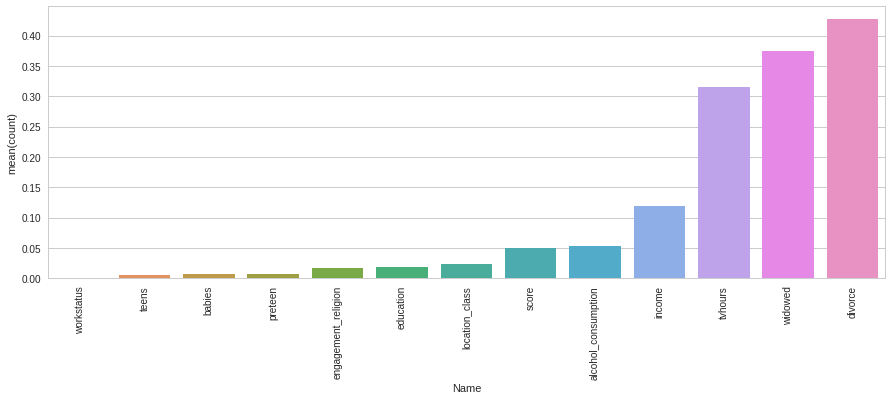

In [14]:
#calling function missing_data() to see the amount of missing data in each column
missing_data(df)

From the above visualisation and table it seems that the columns teens , babies , preteens , engagement_reigion , education , location_class , score , alcohol_consumption can easily be handled. <br>
However , for the columns income , tvhours , widowed , divorce we need to come up something to either fix them or delete them from the DataFrame.

# Feature Engineering

## 1. Income
* The column has 861 missing values.<br>
* The data-type of the column is str<br>
* We first need to categorise the income range before analysing it.<br>
* So we define a function fix_and_plot_income( ) to modify the columns.<br>

In [0]:
#defining function to categorise the income data between range $0 to $30000
def fix_income_data(daf):
    daf['income'].replace('lt $1000', 1000 ,inplace=True)
    daf['income'].replace('$1000 to 2999', 3000 ,inplace=True)
    daf['income'].replace('$3000 to 3999', 4000 ,inplace=True)
    daf['income'].replace('$4000 to 4999', 5000 ,inplace=True)
    daf['income'].replace('$5000 to 5999', 6000 ,inplace=True)
    daf['income'].replace('$6000 to 6999', 7000 ,inplace=True)
    daf['income'].replace('$7000 to 7999', 8000 ,inplace=True)
    daf['income'].replace('$8000 to 9999', 10000 ,inplace=True)
    daf['income'].replace('$10000 - 14999', 15000 ,inplace=True)
    daf['income'].replace('$15000 - 19999', 20000 ,inplace=True)
    daf['income'].replace('$20000 - 24999', 25000 ,inplace=True)
    daf['income'].replace('$25000 or more', 30000 ,inplace=True)
    daf.loc[daf['income'].isnull() , 'income'] = 30000
    print("\nIncome data has been cleaned.\n")
    return daf

def plot_response_vs_income(daf):
    groups = daf.groupby("response")['income']
    fig, ax = plt.subplots(figsize=(15,8))
    for k, v in groups:
        v.hist(label=k, alpha=.5, ax=ax)
    ax.legend()
    plt.title("Response vs Income plot.",loc='left')
    plt.xlabel("Income of People")
    plt.ylabel("Number of People")
    plt.plot()

Categorising and cleaning the income column in training data.


Income data has been cleaned.



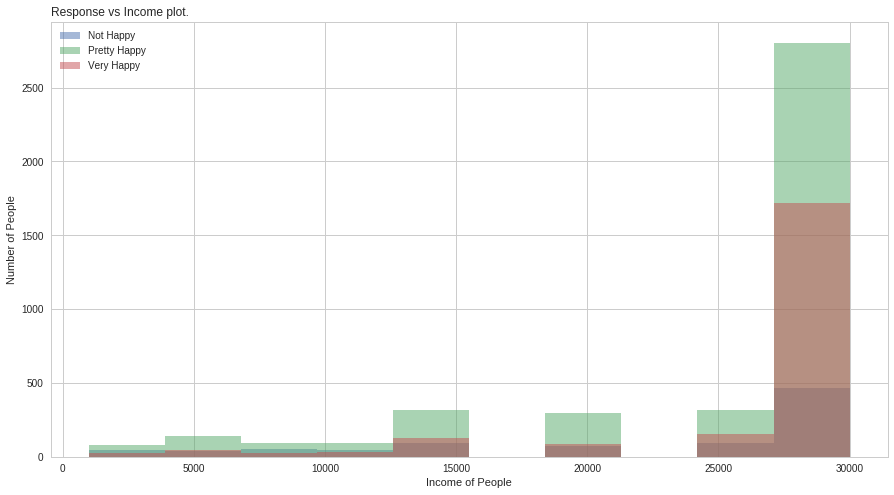

In [16]:
#calling the function fix_and_plot_income_data()
df = fix_income_data(df)
plot_response_vs_income(df)

It seems that most of the data belongs to the people who have high income and this may effect our process.<br>
So we need to analyse it carefully and make sure of Accuracy and Efficiency errors later.

## 2. Preteen , Teen , Babies
* The data-type of the column is numpy.float64<br>
* We are combining the count of the kids in house to define a new column named kids<br>
* We have also substituted the NaN value with 0 to account for the missing value<br>
* So we define a function , create_kids_column( ) to modify the columns.<br>

In [0]:
'''def create_kids_column(daf):
    daf['kids'] = 0
    daf.teens.fillna(0,inplace=True)
    daf.babies.fillna(0,inplace=True)
    daf.preteen.fillna(0,inplace=True)
    daf['kids'] = daf.babies + daf.preteen + daf.teens
    print("Kids column created")
    daf.drop(['preteen', 'teens', 'babies'], axis=1, inplace=True)
    return daf
#calling create_kids_column()
df = create_kids_column(df)'''

def fix_kids_column(daf):
    daf.teens.fillna(daf.teens.median(),inplace=True)
    daf.preteen.fillna(daf.preteen.median(),inplace=True)
    daf.babies.fillna(daf.babies.median(),inplace=True)
    return daf

df = fix_kids_column(df)

## 3. Engagement_Religion
<ul>
<li>The data-type of this column are str
<li>We are combining the same kind of values together in this column like 2-3x a month and more thn once wk
<li>We have now defined a function , fix_religion_data( ) to modify the columns.
</ul>

In [18]:
def fix_religion_data(daf):
    daf['engagement_religion'].replace('never', 0 ,inplace=True)
    daf['engagement_religion'].replace('lt once a year', 1 ,inplace=True)
    daf['engagement_religion'].replace('once a year', 2 ,inplace=True)
    daf['engagement_religion'].replace('sevrl times a yr', 3 ,inplace=True)
    daf['engagement_religion'].replace('once a month', 4 ,inplace=True)
    daf['engagement_religion'].replace('every week', 5 ,inplace=True)
    daf['engagement_religion'].replace('2-3x a month', 6 ,inplace=True)
    daf['engagement_religion'].replace('nrly every week' , 7 ,inplace=True)
    daf['engagement_religion'].replace('more thn once wk', 8 ,inplace=True)
    daf.engagement_religion.fillna(0,inplace=True)
    print("Religion column has been cleaned.\n")
    return daf

#calling function to clean religion data
df = fix_religion_data(df)

Religion column has been cleaned.



## 4. Score  ( ignored because later I had to scale the column )
<ul>
<li>The data-type of the column is numpy.float64
<li>We are changing the whole score to discrete form
<li>A function discr_score( ) is defined to modify the score data.
</ul>

In [0]:
'''def discr_score(df):
    df.loc[ df['score'] <= 20 , 'score']= -1
    df.loc[(df['score'] > 20) & (df['score'] <= 40), 'score'] = -0.5
    df.loc[(df['score'] > 40) & (df['score'] <= 60), 'score'] = 0
    df.loc[(df['score'] > 60) & (df['score'] <= 80), 'score'] = 0.5
    df.loc[ df['score'] > 80, 'score'] = 1
    df.loc[df['score'].isnull() , 'score'] = 0
    return df
#calling discr_score() function
df = discr_score(df)'''

## 5. Education ( ignored because later I had to scale the column )
<ul>
<li>The data-type of the column is numpy.float64
<li>We are changing the whole education score to discrete form
<li>A function fix_edu_data( ) is defined to modify the score data.
</ul>

In [0]:
'''def fix_edu_data(df):
    df.loc[ df['education'] <= 4 , 'education']= -1
    df.loc[(df['education'] > 4) & (df['education'] <= 8), 'education'] = -0.5
    df.loc[(df['education'] > 8) & (df['education'] <= 12), 'education'] = 0
    df.loc[(df['education'] > 12) & (df['education'] <= 16), 'education'] = 0.5
    df.loc[(df['education'] > 16) & (df['education'] <= 20), 'education'] = 0.5
    return df
#calling fix_edu_data()
df = fix_edu_data(df)'''

## 6. Alcohol_consumption
<ul>
<li>The data-type of the column is str
<li>Smaller intake of alcohol consumption was marked 0
<li>The values were grouped together to decrease the column parameters to avoid overfitting
</ul>

In [19]:
def fix_alcohol_data(daf):
    daf['alcohol_consumption'].replace('Once a month', 2 ,inplace=True)
    daf['alcohol_consumption'].replace('Rarely', 1 ,inplace=True)
    daf['alcohol_consumption'].replace('Never', 0 ,inplace=True)
    daf['alcohol_consumption'].replace('Once a week', 5 ,inplace=True)
    daf['alcohol_consumption'].replace('2 - 3 times a month', 4 ,inplace=True)
    daf['alcohol_consumption'].replace('Occassional', 3 ,inplace=True)
    daf['alcohol_consumption'].replace('Multiple times in a week', 6 ,inplace=True)
    daf.alcohol_consumption.fillna(0,inplace=True)
    print("Alhocol column modified")
    return daf
#calling fix_alcohol_data()
df = fix_alcohol_data(df)

Alhocol column modified


## 7. TV
<ul>
<li>The data-type of the column is numpy.float64
<li>The tv hour was found to be negatively effecting the income which in turn was a major cause for response parameter
</ul>

Co-relation between income and tvhours -0.195644597330612


[]

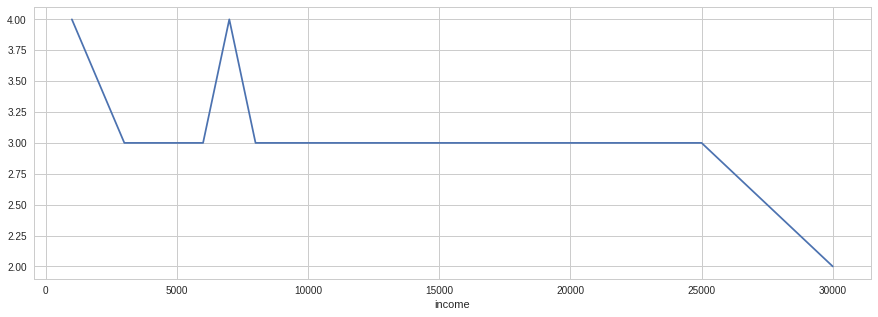

In [20]:
print('Co-relation between income and tvhours',df.tvhours.corr(df.income))
df.groupby('income').tvhours.median().plot(figsize=(15,5))
plt.plot()

We have used the median because the dataframe has more values of those who have high income ,is the data has skewed characteristic.

In [21]:
def fix_tv_data(daf):
    daf.tvhours.fillna(daf.tvhours.median(),inplace=True)
    print("TV data column fixed")
    return daf

#calling the fix_tv_data() function
df = fix_tv_data(df)

TV data column fixed


## 8. Score
<ul>
<li>The data-type of the column is numpy.float64

In [22]:
def fix_score_data(daf):
    daf.score.fillna(daf.score.median(),inplace=True)
    print("Score data column fixed")
    return daf

#calling the fix_tv_data() function
df = fix_score_data(df)

Score data column fixed


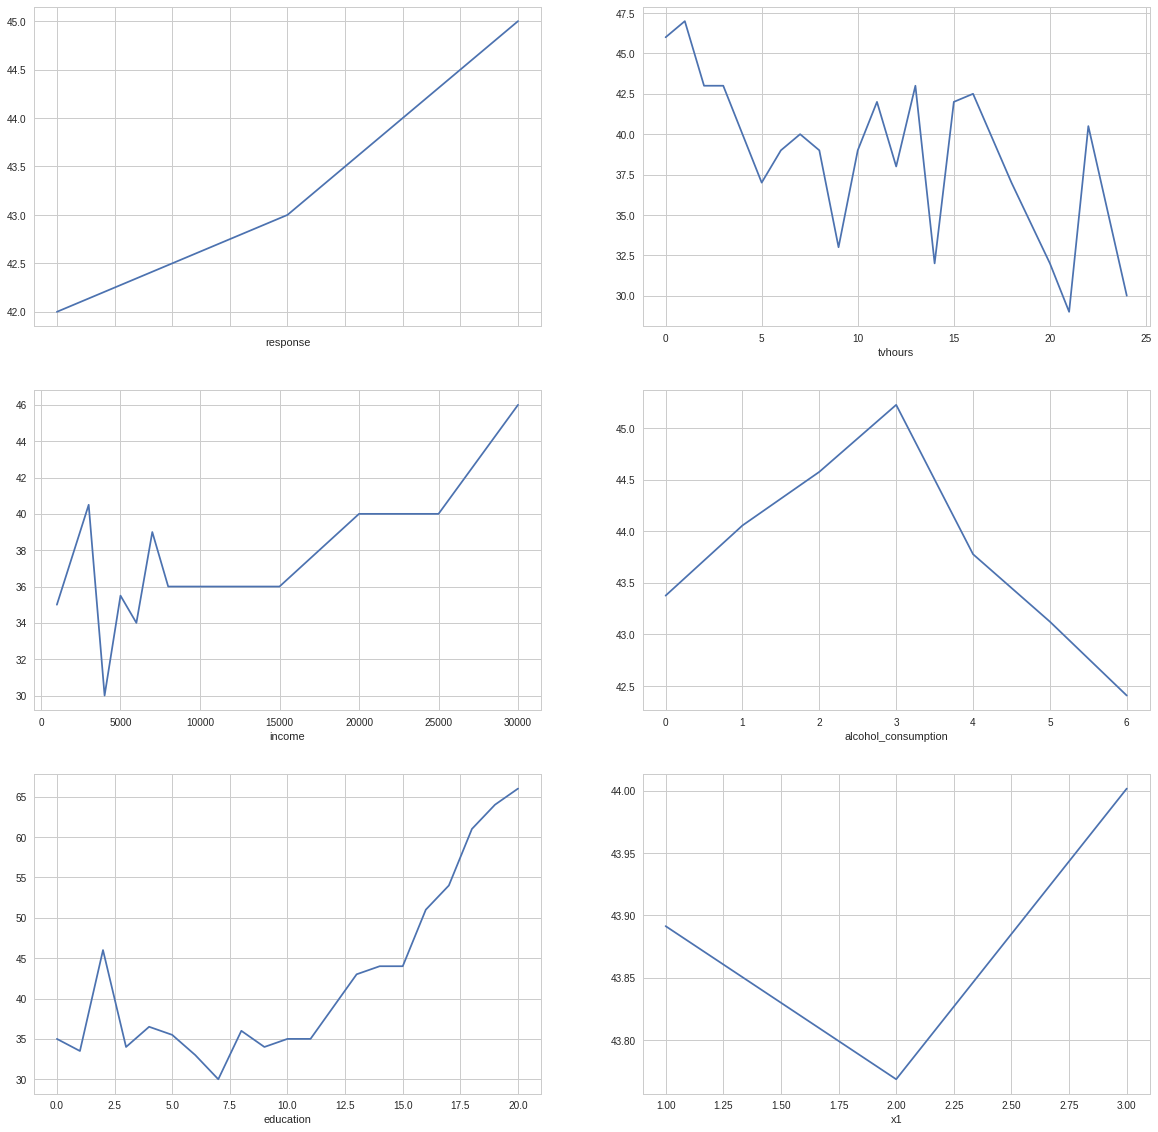

In [23]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
df.groupby('response').score.median().plot()

plt.subplot(3,2,2)
df.groupby('tvhours').score.median().plot()

plt.subplot(3,2,3)
df.groupby('income').score.median().plot()

plt.subplot(3,2,4)
df.groupby('alcohol_consumption').score.mean().plot()

plt.subplot(3,2,5)
df.groupby('education').score.median().plot()


plt.subplot(3,2,6)
df.groupby('x1').score.mean().plot()

plt.figsize=(10,10)
plt.show()

## 9. Education
<ul>
<li>The data-type of the column is numpy.float64

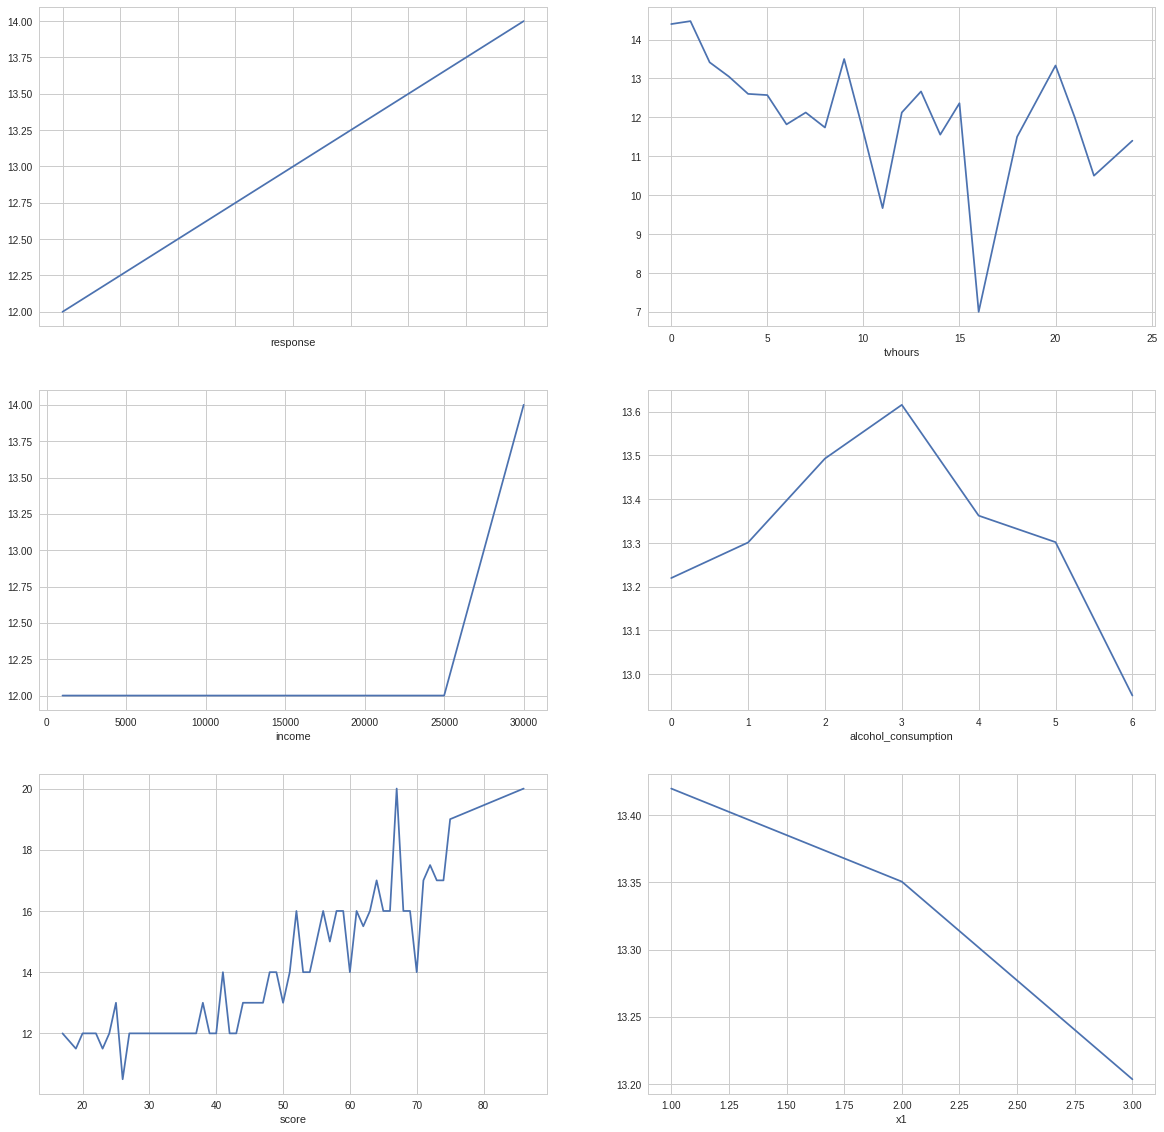

In [24]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
df.groupby('response').education.median().plot()

plt.subplot(3,2,2)
df.groupby('tvhours').education.mean().plot()

plt.subplot(3,2,3)
df.groupby('income').education.median().plot()

plt.subplot(3,2,4)
df.groupby('alcohol_consumption').education.mean().plot()

plt.subplot(3,2,5)
df.groupby('score').education.median().plot()


plt.subplot(3,2,6)
df.groupby('x1').education.mean().plot()

plt.figsize=(10,10)
plt.show()

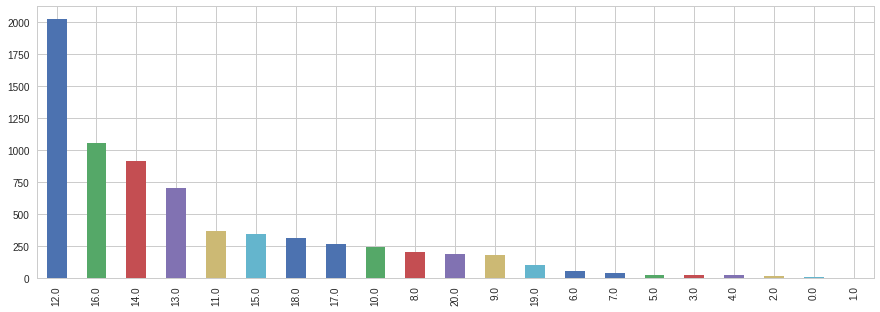

In [25]:
plt.figure(figsize=(15,5))
df.education.value_counts().plot(kind='bar')

In [26]:
def fix_edu_data(daf):
    daf.education.fillna(daf.education.median(),inplace=True)
    print("Education data column fixed")
    return daf

#calling the fix_tv_data() function
df = fix_edu_data(df)

Education data column fixed


## 10. Divorce and Widowed
<ul>
    <li>The data-type of the column is str</li>
    <li>The NULL values were all set to 0 because we cannot establish any relation between widowed,divorce columns with another columns.</li>

In [27]:
def fix_divorce_widow_data(daf):
    daf['divorce'].replace('no', 0 ,inplace=True)
    daf['divorce'].replace('yes', 1 ,inplace=True)
    daf.divorce.fillna(0,inplace=True)
    print("Divorce data column modified.")
    daf['widowed'].replace('no', 0 ,inplace=True)
    daf['widowed'].replace('yes', 1 ,inplace=True)
    daf.widowed.fillna(0,inplace=True)
    print("Widowed data column modified.")
    return daf
    
#calling the above function
df = fix_divorce_widow_data(df)

Divorce data column modified.
Widowed data column modified.


## 11. Work Status
<ul>
<li>The data-type of the column is str

In [28]:
def fix_work_status(daf):
    daf.workstatus.fillna(0,inplace=True)
    daf['workstatus'].replace('temp not working', 0 ,inplace=True)
    daf['workstatus'].replace('unempl, laid off', 0 ,inplace=True)
    daf['workstatus'].replace('school', 0 ,inplace=True)
    daf['workstatus'].replace('retired', 1 ,inplace=True)
    daf['workstatus'].replace('keeping house', 2 ,inplace=True)
    daf['workstatus'].replace('other', 3 ,inplace=True)
    daf['workstatus'].replace('working parttime', 4 ,inplace=True)
    daf['workstatus'].replace('working fulltime', 5 ,inplace=True)
    print("Work Status column modified")
    return daf

#function call to fix_work_status()
df = fix_work_status(df)

Work Status column modified


## 12. Residence region 
<ul>
<li>The data-type of the column is str

In [29]:
def fix_region_data(daf):
    daf['residence_region'].replace('new england', 0 ,inplace=True)
    daf['residence_region'].replace('mountain', 1 ,inplace=True)
    daf['residence_region'].replace('e. sou. central', 2 ,inplace=True)
    daf['residence_region'].replace('foreign', 3 ,inplace=True)
    daf['residence_region'].replace('w. nor. central', 4 ,inplace=True)
    daf['residence_region'].replace('w. sou. central', 5 ,inplace=True)
    daf['residence_region'].replace('pacific', 6 ,inplace=True)
    daf['residence_region'].replace('middle atlantic', 7 ,inplace=True)
    daf['residence_region'].replace('south atlantic', 8 ,inplace=True)
    daf['residence_region'].replace('e. nor. central', 9 ,inplace=True)
    print("Region column modified.")
    return daf

#calling above function
df = fix_region_data(df)

Region column modified.


## 13.Location class 
<ul>
<li>The data-type of the column is str

In [30]:
def fix_location_data(daf):
    daf['location_class'].replace('A', 0 ,inplace=True)
    daf['location_class'].replace('B', 1 ,inplace=True)
    daf['location_class'].replace('C', 2 ,inplace=True)
    daf['location_class'].replace('D', 3 ,inplace=True)
    daf['location_class'].replace('E', 4 ,inplace=True)
    daf['location_class'].replace('F', 5 ,inplace=True)
    daf['location_class'].replace('G', 6 ,inplace=True)
    daf.location_class.fillna(7,inplace=True)
    print("Location_class column modified.")
    return daf

#calling above function
df = fix_location_data(df)

Location_class column modified.


## 14. Response
<ul>
    <li>The data-type of the column is str</li>
    <li>We first need to categorise the response before analysing it.</li>
    <li>So we define a function fix_response_data( ) to modify the columns.</li>

In [31]:
#defining function to clean the response column
def fix_response_data(daf):
    print("Categorising the response column.")
    daf['response'].replace('Very Happy', 1 ,inplace=True)
    daf['response'].replace('Pretty Happy', 0 ,inplace=True)
    daf['response'].replace('Not Happy', -1 ,inplace=True)
    return daf

#calling the fix_response_data()
df = fix_response_data(df)

Categorising the response column.


## 15. Changing data type of all columns
<ul>
<li>The data-type of the columns are changed from  float to int

In [32]:
def change_dtype_cols(daf):
    daf[['alcohol_consumption', 'location_class', 'workstatus',
       'score', 'divorce', 'widowed', 'education', 'residence_region',
       'babies', 'preteen', 'teens', 'income', 'engagement_religion', 'x1',
       'tvhours']] = daf[['alcohol_consumption', 'location_class', 'workstatus',
       'score', 'divorce', 'widowed', 'education', 'residence_region',
       'babies', 'preteen', 'teens', 'income', 'engagement_religion', 'x1',
       'tvhours']].astype(int) 
    print("Data types of column changed")
    return daf

#changing data-type of all columns from float to int
df = change_dtype_cols(df)

Data types of column changed


## 16. Data Preprocessing
<ul>
<li>We can see that Age, Fare are measured on different scales, so we need to do Feature Scaling first before we proceed with predictions.

In [33]:
#preprocessing the data
from sklearn import preprocessing
def preprocess_data(daf):
    std_scale = preprocessing.StandardScaler().fit(daf[['alcohol_consumption', 'location_class', 'workstatus',
       'score', 'divorce', 'widowed', 'education', 'residence_region',
       'babies', 'preteen', 'teens', 'income', 'engagement_religion', 'x1',
       'tvhours']])
    daf[['alcohol_consumption', 'location_class', 'workstatus',
       'score', 'divorce', 'widowed', 'education', 'residence_region',
       'babies', 'preteen', 'teens', 'income', 'engagement_religion', 'x1',
       'tvhours']] = std_scale.transform(daf[['alcohol_consumption', 'location_class', 'workstatus',
       'score', 'divorce', 'widowed', 'education', 'residence_region',
       'babies', 'preteen', 'teens', 'income', 'engagement_religion', 'x1',
       'tvhours']])
    print("Preprocessing complete.")
    return daf

df = preprocess_data(df)

Preprocessing complete.


## 17. The co-relation plot

There are 17 numeric and 1 categorical columns in train data
response               1.000000
income                 0.176785
education              0.114099
engagement_religion    0.106906
score                  0.103953
x1                     0.076703
divorce                0.073337
workstatus             0.067055
widowed                0.014166
preteen                0.011402
babies                 0.010241
gender                -0.009924
residence_region      -0.013227
teens                 -0.014201
location_class        -0.015364
Name: response, dtype: float64 



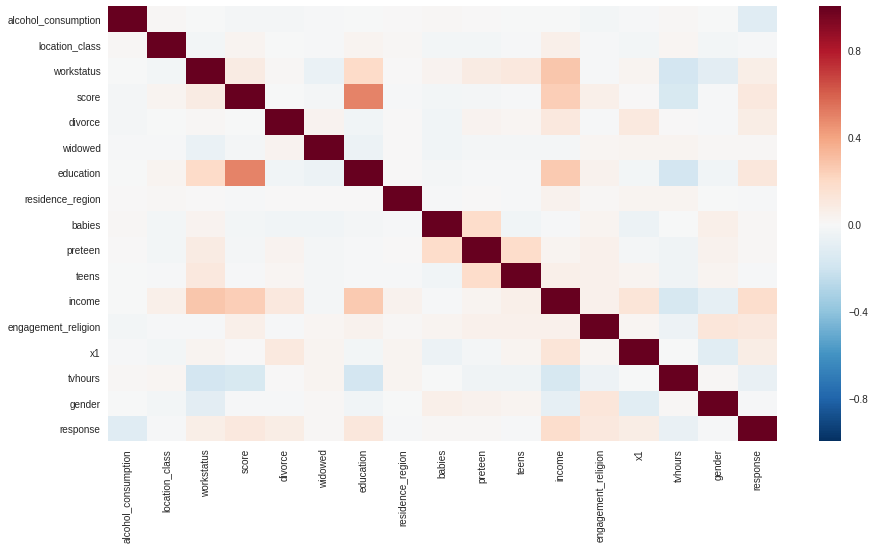

In [34]:
def corr_analysis(daf):
    #separate variables into new data frames
    numeric_data = daf.select_dtypes(include=[np.number])
    cat_data = daf.select_dtypes(exclude=[np.number])
    print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))
    #correlation plot
    plt.figure(figsize=(15,8))
    corr = numeric_data.corr()
    sns.heatmap(corr)
    print (corr['response'].sort_values(ascending=False)[:15], '\n')

corr_analysis(df)

# Importing test file

In [35]:
test = pd.read_csv('test.csv')
test.head()

,id,alcohol_consumption,location_class,workstatus,score,divorce,widowed,education,residence_region,babies,preteen,teens,income,engagement_religion,x1,tvhours,gender
0,citzen1,2 - 3 times a month,A,working fulltime,43.0,NaN,no,12.0,e. nor. central,0.0,0.0,0.0,NaN,once a year,2,3.0,0
1,citzen100,2 - 3 times a month,NaN,working fulltime,42.0,yes,no,12.0,south atlantic,0.0,0.0,0.0,$25000 or more,sevrl times a yr,2,3.0,0
2,citzen10007,Once a week,B,keeping house,21.0,yes,yes,13.0,e. nor. central,0.0,0.0,0.0,$10000 - 14999,never,3,NaN,1
3,citzen10010,2 - 3 times a month,A,working fulltime,46.0,yes,NaN,12.0,south atlantic,0.0,0.0,0.0,$25000 or more,once a year,1,1.0,1
4,citzen10023,Multiple times in a week,F,working parttime,36.0,NaN,NaN,12.0,south atlantic,0.0,0.0,0.0,$25000 or more,never,2,4.0,0


The training data has 3105 rows and 17 columns

The columns in the dataset are : 
['id' 'alcohol_consumption' 'location_class' 'workstatus' 'score'
 'divorce' 'widowed' 'education' 'residence_region' 'babies' 'preteen'
 'teens' 'income' 'engagement_religion' 'x1' 'tvhours' 'gender']

All ID values are unique .
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 17 columns):
id                     3105 non-null object
alcohol_consumption    2939 non-null object
location_class         3037 non-null object
workstatus             3105 non-null object
score                  2945 non-null float64
divorce                1763 non-null object
widowed                1977 non-null object
education              3053 non-null float64
residence_region       3105 non-null object
babies                 3090 non-null float64
preteen                3089 non-null float64
teens                  3092 non-null float64
income                 2742 non-null object
enga

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


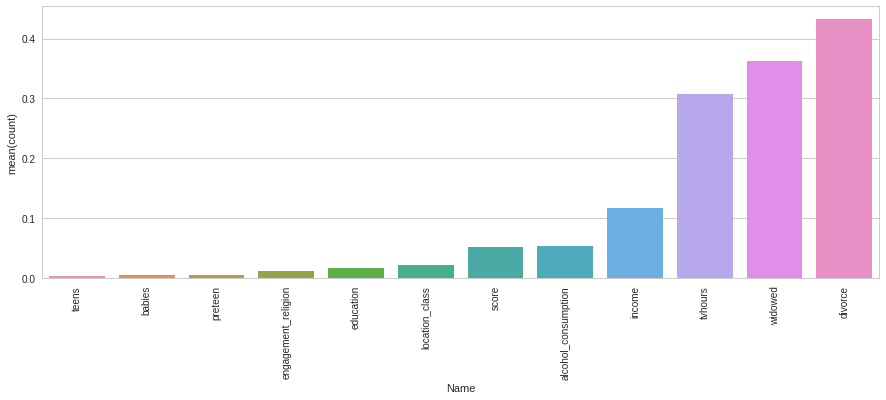

In [36]:
data_detail(test)
missing_data(test)

# Data Preprocessing

In [37]:
test = fix_income_data(test)
test = fix_kids_column(test)
test = fix_religion_data(test)
test = fix_alcohol_data(test)
test = fix_tv_data(test)
test = fix_score_data(test)
test = fix_edu_data(test)
test = fix_divorce_widow_data(test)
test = fix_work_status(test)
test = fix_region_data(test)
test = fix_location_data(test)
test = change_dtype_cols(test)
test = preprocess_data(test)


Income data has been cleaned.

Religion column has been cleaned.

Alhocol column modified
TV data column fixed
Score data column fixed
Education data column fixed
Divorce data column modified.
Widowed data column modified.
Work Status column modified
Region column modified.
Location_class column modified.
Data types of column changed
Preprocessing complete.


# training classifers

In [0]:
X_1 = test.drop(['id','widowed','divorce'],axis=1)
#selecting train and response apart
X = df.drop(['id','response','widowed','divorce'],axis=1)
y = df['response']

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier , VotingClassifier 

# 1.Random Forest

In [40]:
param_grid = [{'max_depth':np.arange(5,15),'min_samples_leaf':np.arange(1,10),'min_samples_split':np.arange(2,5)}]
rf_clf = RandomForestClassifier()
rf_cv = GridSearchCV(rf_clf,param_grid,cv=5,verbose=3)
rf_cv.fit(X,y)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.6108815426997245, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.6177685950413223, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.6144827586206897, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.6045548654244306, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.6024844720496895, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.6143250688705234, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.6136363636363636, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.6041379310344828, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.6004140786749482, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.6004140786749482, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_sam

[CV]  max_depth=5, min_samples_leaf=6, min_samples_split=2, score=0.6184573002754821, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=6, min_samples_split=2, score=0.6124137931034482, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=6, min_samples_split=2, score=0.6038647342995169, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=6, min_samples_split=2, score=0.601104209799862, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=6, min_samples_split=3, score=0.6067493112947658, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=6, min_samples_split=3, score=0.6143250688705234, total=   0.0s
[CV] max_depth=5, min_samples_leaf=6, min_samp

[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.598343685300207, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.598343685300207, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, score=0.6129476584022039, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, score=0.6150137741046832, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, score=0.6110344827586207, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=4, score=0.6004140786749482, total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_sampl

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=4, score=0.6080055210489993, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=4, score=0.6038647342995169, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=2, score=0.6108815426997245, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=2, score=0.6191460055096418, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=2, score=0.6158620689655172, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=2, score=0.6080055210489993, total=   0.0s
[CV] max_depth=6, min_samples_leaf=6, min_sam

[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.6157024793388429, total=   0.1s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.6122589531680441, total=   0.1s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.6151724137931035, total=   0.1s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.611456176673568, total=   0.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.6038647342995169, total=   0.0s
[CV] max_depth=7, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=1, min_samples_split=4, score=0.6088154269972452, total=   0.0s
[CV] max_depth=7, min_samples_leaf=1, min_samp

[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=3, score=0.6073153899240856, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=4, score=0.6074380165289256, total=   0.1s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=4, score=0.6136363636363636, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=4, score=0.6124137931034482, total=   0.1s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=4, score=0.6073153899240856, total=   0.0s
[CV] max_depth=7, min_samples_leaf=5, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=5, min_samples_split=4, score=0.5997239475500346, total=   0.0s
[CV] max_depth=7, min_samples_leaf=6, min_sam

[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=4, score=0.6117241379310345, total=   0.0s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=4, score=0.6066252587991718, total=   0.0s
[CV] max_depth=7, min_samples_leaf=9, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=9, min_samples_split=4, score=0.6045548654244306, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, score=0.6157024793388429, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, score=0.6198347107438017, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=2, score=0.616551724137931, total=   0.0s
[CV] max_depth=8, min_samples_leaf=1, min_samp

[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, score=0.6060606060606061, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, score=0.621900826446281, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, score=0.6089655172413793, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, score=0.5997239475500346, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=2, score=0.6073153899240856, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samples_split=3 ............
[CV]  max_depth=8, min_samples_leaf=5, min_samples_split=3, score=0.6067493112947658, total=   0.1s
[CV] max_depth=8, min_samples_leaf=5, min_samp

[CV]  max_depth=8, min_samples_leaf=9, min_samples_split=2, score=0.6066252587991718, total=   0.0s
[CV] max_depth=8, min_samples_leaf=9, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=9, min_samples_split=2, score=0.6017943409247757, total=   0.0s
[CV] max_depth=8, min_samples_leaf=9, min_samples_split=3 ............
[CV]  max_depth=8, min_samples_leaf=9, min_samples_split=3, score=0.6191460055096418, total=   0.0s
[CV] max_depth=8, min_samples_leaf=9, min_samples_split=3 ............
[CV]  max_depth=8, min_samples_leaf=9, min_samples_split=3, score=0.6184573002754821, total=   0.1s
[CV] max_depth=8, min_samples_leaf=9, min_samples_split=3 ............
[CV]  max_depth=8, min_samples_leaf=9, min_samples_split=3, score=0.6075862068965517, total=   0.1s
[CV] max_depth=8, min_samples_leaf=9, min_samples_split=3 ............
[CV]  max_depth=8, min_samples_leaf=9, min_samples_split=3, score=0.6100759144237405, total=   0.0s
[CV] max_depth=8, min_samples_leaf=9, min_sam

[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.6039944903581267, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.6170798898071626, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.6158620689655172, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.6121463077984817, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.5976535541752933, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, score=0.6163911845730028, total=   0.1s
[CV] max_depth=9, min_samples_leaf=4, min_sam

[CV]  max_depth=9, min_samples_leaf=8, min_samples_split=3, score=0.6096551724137931, total=   0.1s
[CV] max_depth=9, min_samples_leaf=8, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=8, min_samples_split=3, score=0.6142167011732229, total=   0.1s
[CV] max_depth=9, min_samples_leaf=8, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=8, min_samples_split=3, score=0.5997239475500346, total=   0.1s
[CV] max_depth=9, min_samples_leaf=8, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=8, min_samples_split=4, score=0.6108815426997245, total=   0.1s
[CV] max_depth=9, min_samples_leaf=8, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=8, min_samples_split=4, score=0.6150137741046832, total=   0.1s
[CV] max_depth=9, min_samples_leaf=8, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=8, min_samples_split=4, score=0.6110344827586207, total=   0.1s
[CV] max_depth=9, min_samples_leaf=8, min_sam

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.5964187327823691, total=   0.1s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.6143250688705234, total=   0.1s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.5993103448275862, total=   0.1s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.6080055210489993, total=   0.1s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.5935127674258109, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=4 ...........
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=4, score=0.6053719008264463, total=   0.1s
[CV] max_depth=10, min_samples_leaf=3, 

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, score=0.6108815426997245, total=   0.1s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, score=0.609504132231405, total=   0.1s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, score=0.6027586206896551, total=   0.1s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, score=0.6052449965493444, total=   0.1s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, score=0.5955831608005521, total=   0.1s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=4 ...........
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=4, score=0.6039944903581267, total=   0.1s
[CV] max_depth=10, min_samples_leaf=7, m

[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.587991718426501, total=   0.1s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.5838509316770186, total=   0.1s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=3 ...........
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.6033057851239669, total=   0.1s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=3 ...........
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.6232782369146006, total=   0.1s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=3 ...........
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.603448275862069, total=   0.1s
[CV] max_depth=11, min_samples_leaf=2, min_samples_split=3 ...........
[CV]  max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.6135265700483091, total=   0.1s
[CV] max_depth=11, min_samples_leaf=2, mi

[CV]  max_depth=11, min_samples_leaf=5, min_samples_split=4, score=0.5955831608005521, total=   0.1s
[CV] max_depth=11, min_samples_leaf=6, min_samples_split=2 ...........
[CV]  max_depth=11, min_samples_leaf=6, min_samples_split=2, score=0.6067493112947658, total=   0.1s
[CV] max_depth=11, min_samples_leaf=6, min_samples_split=2 ...........
[CV]  max_depth=11, min_samples_leaf=6, min_samples_split=2, score=0.6150137741046832, total=   0.1s
[CV] max_depth=11, min_samples_leaf=6, min_samples_split=2 ...........
[CV]  max_depth=11, min_samples_leaf=6, min_samples_split=2, score=0.6082758620689656, total=   0.1s
[CV] max_depth=11, min_samples_leaf=6, min_samples_split=2 ...........
[CV]  max_depth=11, min_samples_leaf=6, min_samples_split=2, score=0.6100759144237405, total=   0.1s
[CV] max_depth=11, min_samples_leaf=6, min_samples_split=2 ...........
[CV]  max_depth=11, min_samples_leaf=6, min_samples_split=2, score=0.6024844720496895, total=   0.1s
[CV] max_depth=11, min_samples_leaf=6, 

[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.5909090909090909, total=   0.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.6039944903581267, total=   0.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.5924137931034483, total=   0.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.6059351276742581, total=   0.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.5769496204278813, total=   0.1s
[CV] max_depth=12, min_samples_leaf=1, min_samples_split=3 ...........
[CV]  max_depth=12, min_samples_leaf=1, min_samples_split=3, score=0.6005509641873278, total=   0.1s
[CV] max_depth=12, min_samples_leaf=1, 

[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.6062068965517241, total=   0.1s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.6121463077984817, total=   0.1s
[CV] max_depth=12, min_samples_leaf=4, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=4, min_samples_split=4, score=0.5893719806763285, total=   0.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, score=0.5991735537190083, total=   0.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, score=0.6191460055096418, total=   0.1s
[CV] max_depth=12, min_samples_leaf=5, min_samples_split=2 ...........
[CV]  max_depth=12, min_samples_leaf=5, min_samples_split=2, score=0.603448275862069, total=   0.1s
[CV] max_depth=12, min_samples_leaf=5, m

[CV]  max_depth=12, min_samples_leaf=8, min_samples_split=3, score=0.6017943409247757, total=   0.1s
[CV] max_depth=12, min_samples_leaf=8, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=8, min_samples_split=4, score=0.6067493112947658, total=   0.1s
[CV] max_depth=12, min_samples_leaf=8, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=8, min_samples_split=4, score=0.6143250688705234, total=   0.1s
[CV] max_depth=12, min_samples_leaf=8, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=8, min_samples_split=4, score=0.6027586206896551, total=   0.1s
[CV] max_depth=12, min_samples_leaf=8, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=8, min_samples_split=4, score=0.6004140786749482, total=   0.1s
[CV] max_depth=12, min_samples_leaf=8, min_samples_split=4 ...........
[CV]  max_depth=12, min_samples_leaf=8, min_samples_split=4, score=0.5866114561766735, total=   0.1s
[CV] max_depth=12, min_samples_leaf=9, 

[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.6012396694214877, total=   0.1s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=3 ...........
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.5979310344827586, total=   0.1s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=3 ...........
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.6086956521739131, total=   0.1s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=3 ...........
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=3, score=0.5962732919254659, total=   0.1s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=4 ...........
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.6026170798898072, total=   0.1s
[CV] max_depth=13, min_samples_leaf=3, min_samples_split=4 ...........
[CV]  max_depth=13, min_samples_leaf=3, min_samples_split=4, score=0.6170798898071626, total=   0.1s
[CV] max_depth=13, min_samples_leaf=3, 

[CV]  max_depth=13, min_samples_leaf=7, min_samples_split=2, score=0.5955831608005521, total=   0.1s
[CV] max_depth=13, min_samples_leaf=7, min_samples_split=2 ...........
[CV]  max_depth=13, min_samples_leaf=7, min_samples_split=2, score=0.5900621118012422, total=   0.1s
[CV] max_depth=13, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=13, min_samples_leaf=7, min_samples_split=3, score=0.6060606060606061, total=   0.1s
[CV] max_depth=13, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=13, min_samples_leaf=7, min_samples_split=3, score=0.6115702479338843, total=   0.1s
[CV] max_depth=13, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=13, min_samples_leaf=7, min_samples_split=3, score=0.603448275862069, total=   0.1s
[CV] max_depth=13, min_samples_leaf=7, min_samples_split=3 ...........
[CV]  max_depth=13, min_samples_leaf=7, min_samples_split=3, score=0.5935127674258109, total=   0.1s
[CV] max_depth=13, min_samples_leaf=7, m

[CV]  max_depth=14, min_samples_leaf=1, min_samples_split=4, score=0.5900621118012422, total=   0.1s
[CV] max_depth=14, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.5853994490358126, total=   0.1s
[CV] max_depth=14, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.5950413223140496, total=   0.1s
[CV] max_depth=14, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.5917241379310345, total=   0.1s
[CV] max_depth=14, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.5914423740510697, total=   0.1s
[CV] max_depth=14, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.587991718426501, total=   0.1s
[CV] max_depth=14, min_samples_leaf=2, m

[CV]  max_depth=14, min_samples_leaf=5, min_samples_split=4, score=0.6108815426997245, total=   0.1s
[CV] max_depth=14, min_samples_leaf=5, min_samples_split=4 ...........
[CV]  max_depth=14, min_samples_leaf=5, min_samples_split=4, score=0.6103448275862069, total=   0.1s
[CV] max_depth=14, min_samples_leaf=5, min_samples_split=4 ...........
[CV]  max_depth=14, min_samples_leaf=5, min_samples_split=4, score=0.5873015873015873, total=   0.1s
[CV] max_depth=14, min_samples_leaf=5, min_samples_split=4 ...........
[CV]  max_depth=14, min_samples_leaf=5, min_samples_split=4, score=0.5824706694271912, total=   0.1s
[CV] max_depth=14, min_samples_leaf=6, min_samples_split=2 ...........
[CV]  max_depth=14, min_samples_leaf=6, min_samples_split=2, score=0.6026170798898072, total=   0.1s
[CV] max_depth=14, min_samples_leaf=6, min_samples_split=2 ...........
[CV]  max_depth=14, min_samples_leaf=6, min_samples_split=2, score=0.6157024793388429, total=   0.1s
[CV] max_depth=14, min_samples_leaf=6, 

[CV]  max_depth=14, min_samples_leaf=9, min_samples_split=3, score=0.6080055210489993, total=   0.1s
[CV] max_depth=14, min_samples_leaf=9, min_samples_split=3 ...........
[CV]  max_depth=14, min_samples_leaf=9, min_samples_split=3, score=0.6004140786749482, total=   0.1s
[CV] max_depth=14, min_samples_leaf=9, min_samples_split=4 ...........
[CV]  max_depth=14, min_samples_leaf=9, min_samples_split=4, score=0.6053719008264463, total=   0.1s
[CV] max_depth=14, min_samples_leaf=9, min_samples_split=4 ...........
[CV]  max_depth=14, min_samples_leaf=9, min_samples_split=4, score=0.6184573002754821, total=   0.1s
[CV] max_depth=14, min_samples_leaf=9, min_samples_split=4 ...........
[CV]  max_depth=14, min_samples_leaf=9, min_samples_split=4, score=0.5937931034482758, total=   0.1s
[CV] max_depth=14, min_samples_leaf=9, min_samples_split=4 ...........
[CV]  max_depth=14, min_samples_leaf=9, min_samples_split=4, score=0.6045548654244306, total=   0.1s
[CV] max_depth=14, min_samples_leaf=9, 

[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([2, 3, 4])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [41]:
print(rf_cv.best_score_)
print(rf_cv.best_estimator_)

0.6132101489244346
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [0]:
rf_clf = RandomForestClassifier(random_state=42,n_jobs=4,max_depth=8,min_samples_leaf=7,min_samples_split=3)
rf_clf.fit(X,y)
y_pred_rf = rf_clf.predict(X_1)
output_rf = pd.DataFrame(data={'id':test['id'], 'response':y_pred_rf})
output_rf['response'].replace(0,"Pretty Happy",inplace=True)
output_rf['response'].replace(1,"Very Happy",inplace=True)
output_rf['response'].replace(-1,"Not Happy",inplace=True)
output_rf.to_csv("output/result_rf.csv",index=False)

# 2.AdaBoost Classifier

In [44]:
param_grid = [{'n_estimators':np.arange(50,200,20),'learning_rate':np.arange(0.3,1,0.05)}]
ab_clf = AdaBoostClassifier()
ab_cv = GridSearchCV(ab_clf,param_grid,cv=5,verbose=3)
ab_cv.fit(X,y)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV]  learning_rate=0.3, n_estimators=50, score=0.6129476584022039, total=   0.3s
[CV] learning_rate=0.3, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.3, n_estimators=50, score=0.6150137741046832, total=   0.3s
[CV] learning_rate=0.3, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.3, n_estimators=50, score=0.6124137931034482, total=   0.3s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV]  learning_rate=0.3, n_estimators=50, score=0.6059351276742581, total=   0.3s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV]  learning_rate=0.3, n_estimators=50, score=0.6004140786749482, total=   0.4s
[CV] learning_rate=0.3, n_estimators=70 ..............................
[CV]  learning_rate=0.3, n_estimators=70, score=0.6129476584022039, total=   0.4s
[CV] learning_rate=0.3, n_estimators=70 ..............................
[CV]  learning_rate=0.3, n_estimators=70, score=0.6150137741046832, total=   0.4s
[CV] learning_rate=0.3, n_estimators=70 ..............................
[CV]  learning_rate=0.3, n_estimators=70, score=0.613103448275862, total=   0.4s
[CV] learning_rate=0.3, n_estimators=70 ..............................
[CV]  learning_rate=0.3, n_estimators=70, score=0.6059351276742581, total=   0.4s
[

[CV]  learning_rate=0.3, n_estimators=190, score=0.6110344827586207, total=   1.1s
[CV] learning_rate=0.3, n_estimators=190 .............................
[CV]  learning_rate=0.3, n_estimators=190, score=0.611456176673568, total=   1.1s
[CV] learning_rate=0.3, n_estimators=190 .............................
[CV]  learning_rate=0.3, n_estimators=190, score=0.5976535541752933, total=   1.1s
[CV] learning_rate=0.35, n_estimators=50 .............................
[CV]  learning_rate=0.35, n_estimators=50, score=0.6129476584022039, total=   0.3s
[CV] learning_rate=0.35, n_estimators=50 .............................
[CV]  learning_rate=0.35, n_estimators=50, score=0.6157024793388429, total=   0.3s
[CV] learning_rate=0.35, n_estimators=50 .............................
[CV]  learning_rate=0.35, n_estimators=50, score=0.6117241379310345, total=   0.3s
[CV] learning_rate=0.35, n_estimators=50 .............................
[CV]  learning_rate=0.35, n_estimators=50, score=0.6059351276742581, total=  

[CV]  learning_rate=0.35, n_estimators=170, score=0.6124137931034482, total=   1.1s
[CV] learning_rate=0.35, n_estimators=170 ............................
[CV]  learning_rate=0.35, n_estimators=170, score=0.6135265700483091, total=   1.1s
[CV] learning_rate=0.35, n_estimators=170 ............................
[CV]  learning_rate=0.35, n_estimators=170, score=0.5962732919254659, total=   1.1s
[CV] learning_rate=0.35, n_estimators=190 ............................
[CV]  learning_rate=0.35, n_estimators=190, score=0.6143250688705234, total=   1.2s
[CV] learning_rate=0.35, n_estimators=190 ............................
[CV]  learning_rate=0.35, n_estimators=190, score=0.6198347107438017, total=   1.1s
[CV] learning_rate=0.35, n_estimators=190 ............................
[CV]  learning_rate=0.35, n_estimators=190, score=0.6103448275862069, total=   1.1s
[CV] learning_rate=0.35, n_estimators=190 ............................
[CV]  learning_rate=0.35, n_estimators=190, score=0.611456176673568, t

[CV]  learning_rate=0.39999999999999997, n_estimators=150, score=0.6205234159779615, total=   0.9s
[CV] learning_rate=0.39999999999999997, n_estimators=150 .............
[CV]  learning_rate=0.39999999999999997, n_estimators=150, score=0.6110344827586207, total=   0.9s
[CV] learning_rate=0.39999999999999997, n_estimators=150 .............
[CV]  learning_rate=0.39999999999999997, n_estimators=150, score=0.6128364389233955, total=   0.9s
[CV] learning_rate=0.39999999999999997, n_estimators=150 .............
[CV]  learning_rate=0.39999999999999997, n_estimators=150, score=0.598343685300207, total=   0.9s
[CV] learning_rate=0.39999999999999997, n_estimators=170 .............
[CV]  learning_rate=0.39999999999999997, n_estimators=170, score=0.6143250688705234, total=   1.0s
[CV] learning_rate=0.39999999999999997, n_estimators=170 .............
[CV]  learning_rate=0.39999999999999997, n_estimators=170, score=0.6184573002754821, total=   1.1s
[CV] learning_rate=0.39999999999999997, n_estimators

[CV]  learning_rate=0.44999999999999996, n_estimators=110, score=0.5976535541752933, total=   0.7s
[CV] learning_rate=0.44999999999999996, n_estimators=130 .............
[CV]  learning_rate=0.44999999999999996, n_estimators=130, score=0.6143250688705234, total=   0.8s
[CV] learning_rate=0.44999999999999996, n_estimators=130 .............
[CV]  learning_rate=0.44999999999999996, n_estimators=130, score=0.6198347107438017, total=   0.8s
[CV] learning_rate=0.44999999999999996, n_estimators=130 .............
[CV]  learning_rate=0.44999999999999996, n_estimators=130, score=0.6110344827586207, total=   0.8s
[CV] learning_rate=0.44999999999999996, n_estimators=130 .............
[CV]  learning_rate=0.44999999999999996, n_estimators=130, score=0.6093857832988268, total=   0.8s
[CV] learning_rate=0.44999999999999996, n_estimators=130 .............
[CV]  learning_rate=0.44999999999999996, n_estimators=130, score=0.5962732919254659, total=   0.8s
[CV] learning_rate=0.44999999999999996, n_estimator

[CV]  learning_rate=0.49999999999999994, n_estimators=90, score=0.6110344827586207, total=   0.5s
[CV] learning_rate=0.49999999999999994, n_estimators=90 ..............
[CV]  learning_rate=0.49999999999999994, n_estimators=90, score=0.6093857832988268, total=   0.5s
[CV] learning_rate=0.49999999999999994, n_estimators=90 ..............
[CV]  learning_rate=0.49999999999999994, n_estimators=90, score=0.5969634230503795, total=   0.5s
[CV] learning_rate=0.49999999999999994, n_estimators=110 .............
[CV]  learning_rate=0.49999999999999994, n_estimators=110, score=0.6108815426997245, total=   0.6s
[CV] learning_rate=0.49999999999999994, n_estimators=110 .............
[CV]  learning_rate=0.49999999999999994, n_estimators=110, score=0.6177685950413223, total=   0.6s
[CV] learning_rate=0.49999999999999994, n_estimators=110 .............
[CV]  learning_rate=0.49999999999999994, n_estimators=110, score=0.6117241379310345, total=   0.7s
[CV] learning_rate=0.49999999999999994, n_estimators=1

[CV]  learning_rate=0.5499999999999999, n_estimators=70, score=0.6143250688705234, total=   0.4s
[CV] learning_rate=0.5499999999999999, n_estimators=70 ...............
[CV]  learning_rate=0.5499999999999999, n_estimators=70, score=0.6191460055096418, total=   0.4s
[CV] learning_rate=0.5499999999999999, n_estimators=70 ...............
[CV]  learning_rate=0.5499999999999999, n_estimators=70, score=0.6117241379310345, total=   0.4s
[CV] learning_rate=0.5499999999999999, n_estimators=70 ...............
[CV]  learning_rate=0.5499999999999999, n_estimators=70, score=0.6086956521739131, total=   0.4s
[CV] learning_rate=0.5499999999999999, n_estimators=70 ...............
[CV]  learning_rate=0.5499999999999999, n_estimators=70, score=0.6004140786749482, total=   0.4s
[CV] learning_rate=0.5499999999999999, n_estimators=90 ...............
[CV]  learning_rate=0.5499999999999999, n_estimators=90, score=0.6122589531680441, total=   0.6s
[CV] learning_rate=0.5499999999999999, n_estimators=90 ........

[CV]  learning_rate=0.5499999999999999, n_estimators=190, score=0.6080055210489993, total=   1.1s
[CV] learning_rate=0.5499999999999999, n_estimators=190 ..............
[CV]  learning_rate=0.5499999999999999, n_estimators=190, score=0.598343685300207, total=   1.1s
[CV] learning_rate=0.5999999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.5999999999999999, n_estimators=50, score=0.6143250688705234, total=   0.3s
[CV] learning_rate=0.5999999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.5999999999999999, n_estimators=50, score=0.6205234159779615, total=   0.3s
[CV] learning_rate=0.5999999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.5999999999999999, n_estimators=50, score=0.6110344827586207, total=   0.3s
[CV] learning_rate=0.5999999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.5999999999999999, n_estimators=50, score=0.6066252587991718, total=   0.3s
[CV] learning_rate=0.5999999999999999, n_estimators=50 .......

[CV]  learning_rate=0.5999999999999999, n_estimators=170, score=0.6232782369146006, total=   1.0s
[CV] learning_rate=0.5999999999999999, n_estimators=170 ..............
[CV]  learning_rate=0.5999999999999999, n_estimators=170, score=0.6075862068965517, total=   0.9s
[CV] learning_rate=0.5999999999999999, n_estimators=170 ..............
[CV]  learning_rate=0.5999999999999999, n_estimators=170, score=0.6059351276742581, total=   1.0s
[CV] learning_rate=0.5999999999999999, n_estimators=170 ..............
[CV]  learning_rate=0.5999999999999999, n_estimators=170, score=0.5969634230503795, total=   1.1s
[CV] learning_rate=0.5999999999999999, n_estimators=190 ..............
[CV]  learning_rate=0.5999999999999999, n_estimators=190, score=0.6143250688705234, total=   1.2s
[CV] learning_rate=0.5999999999999999, n_estimators=190 ..............
[CV]  learning_rate=0.5999999999999999, n_estimators=190, score=0.6225895316804407, total=   1.1s
[CV] learning_rate=0.5999999999999999, n_estimators=190 .

[CV]  learning_rate=0.6499999999999999, n_estimators=130, score=0.598343685300207, total=   0.7s
[CV] learning_rate=0.6499999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.6499999999999999, n_estimators=150, score=0.6081267217630854, total=   0.9s
[CV] learning_rate=0.6499999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.6499999999999999, n_estimators=150, score=0.6184573002754821, total=   0.8s
[CV] learning_rate=0.6499999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.6499999999999999, n_estimators=150, score=0.6096551724137931, total=   0.9s
[CV] learning_rate=0.6499999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.6499999999999999, n_estimators=150, score=0.6086956521739131, total=   0.9s
[CV] learning_rate=0.6499999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.6499999999999999, n_estimators=150, score=0.598343685300207, total=   0.8s
[CV] learning_rate=0.6499999999999999, n_estimators=170 ...

[CV]  learning_rate=0.7, n_estimators=110, score=0.6080055210489993, total=   0.6s
[CV] learning_rate=0.7, n_estimators=110 .............................
[CV]  learning_rate=0.7, n_estimators=110, score=0.5976535541752933, total=   0.6s
[CV] learning_rate=0.7, n_estimators=130 .............................
[CV]  learning_rate=0.7, n_estimators=130, score=0.6101928374655647, total=   0.7s
[CV] learning_rate=0.7, n_estimators=130 .............................
[CV]  learning_rate=0.7, n_estimators=130, score=0.6212121212121212, total=   0.8s
[CV] learning_rate=0.7, n_estimators=130 .............................
[CV]  learning_rate=0.7, n_estimators=130, score=0.603448275862069, total=   0.8s
[CV] learning_rate=0.7, n_estimators=130 .............................
[CV]  learning_rate=0.7, n_estimators=130, score=0.6073153899240856, total=   0.7s
[CV] learning_rate=0.7, n_estimators=130 .............................
[CV]  learning_rate=0.7, n_estimators=130, score=0.6045548654244306, total=  

[CV]  learning_rate=0.7499999999999999, n_estimators=90, score=0.6093857832988268, total=   0.5s
[CV] learning_rate=0.7499999999999999, n_estimators=90 ...............
[CV]  learning_rate=0.7499999999999999, n_estimators=90, score=0.6086956521739131, total=   0.5s
[CV] learning_rate=0.7499999999999999, n_estimators=110 ..............
[CV]  learning_rate=0.7499999999999999, n_estimators=110, score=0.6108815426997245, total=   0.6s
[CV] learning_rate=0.7499999999999999, n_estimators=110 ..............
[CV]  learning_rate=0.7499999999999999, n_estimators=110, score=0.6177685950413223, total=   0.6s
[CV] learning_rate=0.7499999999999999, n_estimators=110 ..............
[CV]  learning_rate=0.7499999999999999, n_estimators=110, score=0.6089655172413793, total=   0.7s
[CV] learning_rate=0.7499999999999999, n_estimators=110 ..............
[CV]  learning_rate=0.7499999999999999, n_estimators=110, score=0.611456176673568, total=   0.6s
[CV] learning_rate=0.7499999999999999, n_estimators=110 ....

[CV]  learning_rate=0.7999999999999998, n_estimators=70, score=0.6225895316804407, total=   0.4s
[CV] learning_rate=0.7999999999999998, n_estimators=70 ...............
[CV]  learning_rate=0.7999999999999998, n_estimators=70, score=0.6096551724137931, total=   0.4s
[CV] learning_rate=0.7999999999999998, n_estimators=70 ...............
[CV]  learning_rate=0.7999999999999998, n_estimators=70, score=0.6059351276742581, total=   0.4s
[CV] learning_rate=0.7999999999999998, n_estimators=70 ...............
[CV]  learning_rate=0.7999999999999998, n_estimators=70, score=0.6052449965493444, total=   0.4s
[CV] learning_rate=0.7999999999999998, n_estimators=90 ...............
[CV]  learning_rate=0.7999999999999998, n_estimators=90, score=0.6060606060606061, total=   0.5s
[CV] learning_rate=0.7999999999999998, n_estimators=90 ...............
[CV]  learning_rate=0.7999999999999998, n_estimators=90, score=0.6225895316804407, total=   0.5s
[CV] learning_rate=0.7999999999999998, n_estimators=90 ........

[CV]  learning_rate=0.7999999999999998, n_estimators=190, score=0.6093857832988268, total=   1.1s
[CV] learning_rate=0.8499999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.8499999999999999, n_estimators=50, score=0.6150137741046832, total=   0.3s
[CV] learning_rate=0.8499999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.8499999999999999, n_estimators=50, score=0.6163911845730028, total=   0.3s
[CV] learning_rate=0.8499999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.8499999999999999, n_estimators=50, score=0.6068965517241379, total=   0.3s
[CV] learning_rate=0.8499999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.8499999999999999, n_estimators=50, score=0.6066252587991718, total=   0.3s
[CV] learning_rate=0.8499999999999999, n_estimators=50 ...............
[CV]  learning_rate=0.8499999999999999, n_estimators=50, score=0.6121463077984817, total=   0.3s
[CV] learning_rate=0.8499999999999999, n_estimators=70 .......

[CV]  learning_rate=0.8499999999999999, n_estimators=170, score=0.6110344827586207, total=   0.9s
[CV] learning_rate=0.8499999999999999, n_estimators=170 ..............
[CV]  learning_rate=0.8499999999999999, n_estimators=170, score=0.6093857832988268, total=   0.9s
[CV] learning_rate=0.8499999999999999, n_estimators=170 ..............
[CV]  learning_rate=0.8499999999999999, n_estimators=170, score=0.6059351276742581, total=   1.0s
[CV] learning_rate=0.8499999999999999, n_estimators=190 ..............
[CV]  learning_rate=0.8499999999999999, n_estimators=190, score=0.6074380165289256, total=   1.1s
[CV] learning_rate=0.8499999999999999, n_estimators=190 ..............
[CV]  learning_rate=0.8499999999999999, n_estimators=190, score=0.6115702479338843, total=   1.1s
[CV] learning_rate=0.8499999999999999, n_estimators=190 ..............
[CV]  learning_rate=0.8499999999999999, n_estimators=190, score=0.6144827586206897, total=   1.1s
[CV] learning_rate=0.8499999999999999, n_estimators=190 .

[CV]  learning_rate=0.8999999999999999, n_estimators=150, score=0.6060606060606061, total=   0.8s
[CV] learning_rate=0.8999999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.8999999999999999, n_estimators=150, score=0.6122589531680441, total=   0.8s
[CV] learning_rate=0.8999999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.8999999999999999, n_estimators=150, score=0.6124137931034482, total=   0.8s
[CV] learning_rate=0.8999999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.8999999999999999, n_estimators=150, score=0.6100759144237405, total=   0.8s
[CV] learning_rate=0.8999999999999999, n_estimators=150 ..............
[CV]  learning_rate=0.8999999999999999, n_estimators=150, score=0.6045548654244306, total=   0.9s
[CV] learning_rate=0.8999999999999999, n_estimators=170 ..............
[CV]  learning_rate=0.8999999999999999, n_estimators=170, score=0.6046831955922864, total=   1.0s
[CV] learning_rate=0.8999999999999999, n_estimators=170 .

[CV]  learning_rate=0.95, n_estimators=110, score=0.5997239475500346, total=   0.7s
[CV] learning_rate=0.95, n_estimators=130 ............................
[CV]  learning_rate=0.95, n_estimators=130, score=0.6046831955922864, total=   0.8s
[CV] learning_rate=0.95, n_estimators=130 ............................
[CV]  learning_rate=0.95, n_estimators=130, score=0.6157024793388429, total=   0.7s
[CV] learning_rate=0.95, n_estimators=130 ............................
[CV]  learning_rate=0.95, n_estimators=130, score=0.616551724137931, total=   0.7s
[CV] learning_rate=0.95, n_estimators=130 ............................
[CV]  learning_rate=0.95, n_estimators=130, score=0.6107660455486542, total=   0.7s
[CV] learning_rate=0.95, n_estimators=130 ............................
[CV]  learning_rate=0.95, n_estimators=130, score=0.6038647342995169, total=   0.7s
[CV] learning_rate=0.95, n_estimators=150 ............................
[CV]  learning_rate=0.95, n_estimators=150, score=0.6019283746556474, t

[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  7.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': array([ 50,  70,  90, 110, 130, 150, 170, 190]), 'learning_rate': array([0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ,
       0.85, 0.9 , 0.95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [45]:
print(ab_cv.best_params_)
print(ab_cv.best_score_)
print(ab_cv.best_estimator_)

{'learning_rate': 0.7499999999999999, 'n_estimators': 90}
0.6136238279095422
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7499999999999999, n_estimators=90,
          random_state=None)


In [0]:
ab_clf = AdaBoostClassifier(n_estimators=170,learning_rate=0.75,random_state=42)
ab_clf.fit(X,y)
ab_pred = ab_clf.predict(X_1)
output_ab = pd.DataFrame(data={'id':test['id'], 'response':ab_pred})
output_ab['response'].replace(0,"Pretty Happy",inplace=True)
output_ab['response'].replace(1,"Very Happy",inplace=True)
output_ab['response'].replace(-1,"Not Happy",inplace=True)
output_ab.to_csv("output/resul_ab.csv",index=False)

# 3.Gradient Boost

In [47]:
param_grid = [{'learning_rate':np.arange(0.3,1,0.5),'n_estimators':np.arange(50,100,10),'min_samples_split':np.arange(2,8)}]
gb_clf = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb_clf,param_grid,cv=5,verbose=3)
gb_cv.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=50 .........
[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=50, score=0.5977961432506887, total=   1.1s
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=50 .........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=50, score=0.6081267217630854, total=   1.0s
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=50 .........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=50, score=0.6075862068965517, total=   1.0s
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=50 .........
[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=50, score=0.5990338164251208, total=   1.0s
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=50 .........
[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=50, score=0.5928226363008972, total=   0.9s
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=60 .........
[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=60, score=0.5991735537190083, total=   1.1s
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=60 .........
[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=60, score=0.6067493112947658, total=   1.1s
[CV] learning_rate=0.3, min_samples_split=2, n_estimators=60 .........
[CV]  learning_rate=0.3, min_samples_split=2, n_estimators=60, score=0.6048275862068966, total=   1.1s
[CV] learning_rate=0.3, min

[CV]  learning_rate=0.3, min_samples_split=3, n_estimators=70, score=0.5991735537190083, total=   1.3s
[CV] learning_rate=0.3, min_samples_split=3, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=3, n_estimators=70, score=0.6060606060606061, total=   1.3s
[CV] learning_rate=0.3, min_samples_split=3, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=3, n_estimators=70, score=0.6027586206896551, total=   1.3s
[CV] learning_rate=0.3, min_samples_split=3, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=3, n_estimators=70, score=0.5928226363008972, total=   1.3s
[CV] learning_rate=0.3, min_samples_split=3, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=3, n_estimators=70, score=0.590752242926156, total=   1.3s
[CV] learning_rate=0.3, min_samples_split=3, n_estimators=80 .........
[CV]  learning_rate=0.3, min_samples_split=3, n_estimators=80, score=0.6012396694214877, total=   1.4s
[CV] learning_rate=0.3, min_

[CV]  learning_rate=0.3, min_samples_split=4, n_estimators=80, score=0.5893719806763285, total=   1.5s
[CV] learning_rate=0.3, min_samples_split=4, n_estimators=80 .........
[CV]  learning_rate=0.3, min_samples_split=4, n_estimators=80, score=0.5852311939268461, total=   1.4s
[CV] learning_rate=0.3, min_samples_split=4, n_estimators=90 .........
[CV]  learning_rate=0.3, min_samples_split=4, n_estimators=90, score=0.5991735537190083, total=   1.6s
[CV] learning_rate=0.3, min_samples_split=4, n_estimators=90 .........
[CV]  learning_rate=0.3, min_samples_split=4, n_estimators=90, score=0.6060606060606061, total=   1.8s
[CV] learning_rate=0.3, min_samples_split=4, n_estimators=90 .........
[CV]  learning_rate=0.3, min_samples_split=4, n_estimators=90, score=0.5951724137931035, total=   1.7s
[CV] learning_rate=0.3, min_samples_split=4, n_estimators=90 .........
[CV]  learning_rate=0.3, min_samples_split=4, n_estimators=90, score=0.5914423740510697, total=   1.7s
[CV] learning_rate=0.3, min

[CV]  learning_rate=0.3, min_samples_split=6, n_estimators=50, score=0.6129476584022039, total=   1.0s
[CV] learning_rate=0.3, min_samples_split=6, n_estimators=50 .........
[CV]  learning_rate=0.3, min_samples_split=6, n_estimators=50, score=0.6048275862068966, total=   1.0s
[CV] learning_rate=0.3, min_samples_split=6, n_estimators=50 .........
[CV]  learning_rate=0.3, min_samples_split=6, n_estimators=50, score=0.6017943409247757, total=   1.0s
[CV] learning_rate=0.3, min_samples_split=6, n_estimators=50 .........
[CV]  learning_rate=0.3, min_samples_split=6, n_estimators=50, score=0.5976535541752933, total=   0.9s
[CV] learning_rate=0.3, min_samples_split=6, n_estimators=60 .........
[CV]  learning_rate=0.3, min_samples_split=6, n_estimators=60, score=0.6039944903581267, total=   1.1s
[CV] learning_rate=0.3, min_samples_split=6, n_estimators=60 .........
[CV]  learning_rate=0.3, min_samples_split=6, n_estimators=60, score=0.6101928374655647, total=   1.1s
[CV] learning_rate=0.3, min

[CV]  learning_rate=0.3, min_samples_split=7, n_estimators=60, score=0.590752242926156, total=   1.0s
[CV] learning_rate=0.3, min_samples_split=7, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=7, n_estimators=70, score=0.6019283746556474, total=   1.2s
[CV] learning_rate=0.3, min_samples_split=7, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=7, n_estimators=70, score=0.6060606060606061, total=   1.2s
[CV] learning_rate=0.3, min_samples_split=7, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=7, n_estimators=70, score=0.6055172413793104, total=   1.2s
[CV] learning_rate=0.3, min_samples_split=7, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=7, n_estimators=70, score=0.6052449965493444, total=   1.2s
[CV] learning_rate=0.3, min_samples_split=7, n_estimators=70 .........
[CV]  learning_rate=0.3, min_samples_split=7, n_estimators=70, score=0.583160800552105, total=   1.3s
[CV] learning_rate=0.3, min_s

[CV]  learning_rate=0.8, min_samples_split=2, n_estimators=80, score=0.5710344827586207, total=   1.4s
[CV] learning_rate=0.8, min_samples_split=2, n_estimators=80 .........
[CV]  learning_rate=0.8, min_samples_split=2, n_estimators=80, score=0.5721187025534852, total=   1.5s
[CV] learning_rate=0.8, min_samples_split=2, n_estimators=80 .........
[CV]  learning_rate=0.8, min_samples_split=2, n_estimators=80, score=0.5603864734299517, total=   1.5s
[CV] learning_rate=0.8, min_samples_split=2, n_estimators=90 .........
[CV]  learning_rate=0.8, min_samples_split=2, n_estimators=90, score=0.5668044077134986, total=   1.7s
[CV] learning_rate=0.8, min_samples_split=2, n_estimators=90 .........
[CV]  learning_rate=0.8, min_samples_split=2, n_estimators=90, score=0.5922865013774105, total=   1.5s
[CV] learning_rate=0.8, min_samples_split=2, n_estimators=90 .........
[CV]  learning_rate=0.8, min_samples_split=2, n_estimators=90, score=0.5793103448275863, total=   1.6s
[CV] learning_rate=0.8, min

[CV]  learning_rate=0.8, min_samples_split=4, n_estimators=50, score=0.5819559228650137, total=   0.9s
[CV] learning_rate=0.8, min_samples_split=4, n_estimators=50 .........
[CV]  learning_rate=0.8, min_samples_split=4, n_estimators=50, score=0.5909090909090909, total=   0.9s
[CV] learning_rate=0.8, min_samples_split=4, n_estimators=50 .........
[CV]  learning_rate=0.8, min_samples_split=4, n_estimators=50, score=0.5820689655172414, total=   0.9s
[CV] learning_rate=0.8, min_samples_split=4, n_estimators=50 .........
[CV]  learning_rate=0.8, min_samples_split=4, n_estimators=50, score=0.5845410628019324, total=   0.9s
[CV] learning_rate=0.8, min_samples_split=4, n_estimators=50 .........
[CV]  learning_rate=0.8, min_samples_split=4, n_estimators=50, score=0.5693581780538303, total=   0.9s
[CV] learning_rate=0.8, min_samples_split=4, n_estimators=60 .........
[CV]  learning_rate=0.8, min_samples_split=4, n_estimators=60, score=0.5860881542699724, total=   1.0s
[CV] learning_rate=0.8, min

[CV]  learning_rate=0.8, min_samples_split=5, n_estimators=60, score=0.5852311939268461, total=   1.1s
[CV] learning_rate=0.8, min_samples_split=5, n_estimators=60 .........
[CV]  learning_rate=0.8, min_samples_split=5, n_estimators=60, score=0.5603864734299517, total=   1.1s
[CV] learning_rate=0.8, min_samples_split=5, n_estimators=70 .........
[CV]  learning_rate=0.8, min_samples_split=5, n_estimators=70, score=0.5730027548209367, total=   1.3s
[CV] learning_rate=0.8, min_samples_split=5, n_estimators=70 .........
[CV]  learning_rate=0.8, min_samples_split=5, n_estimators=70, score=0.5902203856749312, total=   1.3s
[CV] learning_rate=0.8, min_samples_split=5, n_estimators=70 .........
[CV]  learning_rate=0.8, min_samples_split=5, n_estimators=70, score=0.5737931034482758, total=   1.3s
[CV] learning_rate=0.8, min_samples_split=5, n_estimators=70 .........
[CV]  learning_rate=0.8, min_samples_split=5, n_estimators=70, score=0.5838509316770186, total=   1.3s
[CV] learning_rate=0.8, min

[CV]  learning_rate=0.8, min_samples_split=6, n_estimators=80, score=0.5847107438016529, total=   1.3s
[CV] learning_rate=0.8, min_samples_split=6, n_estimators=80 .........
[CV]  learning_rate=0.8, min_samples_split=6, n_estimators=80, score=0.5662068965517242, total=   1.3s
[CV] learning_rate=0.8, min_samples_split=6, n_estimators=80 .........
[CV]  learning_rate=0.8, min_samples_split=6, n_estimators=80, score=0.5700483091787439, total=   1.4s
[CV] learning_rate=0.8, min_samples_split=6, n_estimators=80 .........
[CV]  learning_rate=0.8, min_samples_split=6, n_estimators=80, score=0.5583160800552105, total=   1.4s
[CV] learning_rate=0.8, min_samples_split=6, n_estimators=90 .........
[CV]  learning_rate=0.8, min_samples_split=6, n_estimators=90, score=0.5668044077134986, total=   1.6s
[CV] learning_rate=0.8, min_samples_split=6, n_estimators=90 .........
[CV]  learning_rate=0.8, min_samples_split=6, n_estimators=90, score=0.5853994490358126, total=   1.7s
[CV] learning_rate=0.8, min

[CV]  learning_rate=0.8, min_samples_split=7, n_estimators=90, score=0.556935817805383, total=   1.6s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'learning_rate': array([0.3, 0.8]), 'n_estimators': array([50, 60, 70, 80, 90]), 'min_samples_split': array([2, 3, 4, 5, 6, 7])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [48]:
print(gb_cv.best_params_)
print(gb_cv.best_score_)
print(gb_cv.best_estimator_)

{'learning_rate': 0.3, 'min_samples_split': 6, 'n_estimators': 50}
0.6043849972421401
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=6,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [0]:
gb_clf = GradientBoostingClassifier(n_estimators=50,learning_rate=0.3,min_samples_split=6 ,random_state=42)
gb_clf.fit(X,y)
gb_pred = gb_clf.predict(X_1)
output_gb = pd.DataFrame(data={'id':test['id'], 'response':gb_pred})
output_gb['response'].replace(0,"Pretty Happy",inplace=True)
output_gb['response'].replace(1,"Very Happy",inplace=True)
output_gb['response'].replace(-1,"Not Happy",inplace=True)
output_gb.to_csv("output/resul_gb.csv",index=False)

# 4. K Neighbour

In [50]:
param_grid = [{'weights':['uniform','distance'],'n_neighbors':np.arange(1,20)}]
kn_clf = KNeighborsClassifier()
kn_cv = GridSearchCV(kn_clf,param_grid,cv=5,verbose=3)
kn_cv.fit(X,y)

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV]  n_neighbors=1, weights=uniform, score=0.4669421487603306, total=   0.2s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_neighbors=1, weights=uniform, score=0.4820936639118457, total=   0.2s
[CV] n_neighbors=1, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  n_neighbors=1, weights=uniform, score=0.45517241379310347, total=   0.2s
[CV] n_neighbors=1, weights=uniform ..................................
[CV]  n_neighbors=1, weights=uniform, score=0.46790890269151136, total=   0.2s
[CV] n_neighbors=1, weights=uniform ..................................
[CV]  n_neighbors=1, weights=uniform, score=0.47342995169082125, total=   0.2s
[CV] n_neighbors=1, weights=distance .................................
[CV]  n_neighbors=1, weights=distance, score=0.4669421487603306, total=   0.2s
[CV] n_neighbors=1, weights=distance .................................
[CV]  n_neighbors=1, weights=distance, score=0.4820936639118457, total=   0.2s
[CV] n_neighbors=1, weights=distance .................................
[CV]  n_neighbors=1, weights=distance, score=0.45517241379310347, total=   0.2s
[CV] n_neighbors=1, weights=distance .................................
[CV]  n_neighbors=1, weights=distance, score=0.46790890269151136, total=   0.2s
[CV] n_neighbors=1,

[CV]  n_neighbors=4, weights=distance, score=0.5086266390614217, total=   0.2s
[CV] n_neighbors=4, weights=distance .................................
[CV]  n_neighbors=4, weights=distance, score=0.5010351966873706, total=   0.2s
[CV] n_neighbors=5, weights=uniform ..................................
[CV]  n_neighbors=5, weights=uniform, score=0.5151515151515151, total=   0.2s
[CV] n_neighbors=5, weights=uniform ..................................
[CV]  n_neighbors=5, weights=uniform, score=0.5179063360881543, total=   0.2s
[CV] n_neighbors=5, weights=uniform ..................................
[CV]  n_neighbors=5, weights=uniform, score=0.4896551724137931, total=   0.2s
[CV] n_neighbors=5, weights=uniform ..................................
[CV]  n_neighbors=5, weights=uniform, score=0.5031055900621118, total=   0.2s
[CV] n_neighbors=5, weights=uniform ..................................
[CV]  n_neighbors=5, weights=uniform, score=0.5175983436853002, total=   0.2s
[CV] n_neighbors=5, weight

[CV]  n_neighbors=8, weights=uniform, score=0.5348516218081435, total=   0.3s
[CV] n_neighbors=8, weights=distance .................................
[CV]  n_neighbors=8, weights=distance, score=0.53099173553719, total=   0.3s
[CV] n_neighbors=8, weights=distance .................................
[CV]  n_neighbors=8, weights=distance, score=0.5475206611570248, total=   0.2s
[CV] n_neighbors=8, weights=distance .................................
[CV]  n_neighbors=8, weights=distance, score=0.4993103448275862, total=   0.3s
[CV] n_neighbors=8, weights=distance .................................
[CV]  n_neighbors=8, weights=distance, score=0.5314009661835749, total=   0.2s
[CV] n_neighbors=8, weights=distance .................................
[CV]  n_neighbors=8, weights=distance, score=0.5189786059351277, total=   0.2s
[CV] n_neighbors=9, weights=uniform ..................................
[CV]  n_neighbors=9, weights=uniform, score=0.5447658402203857, total=   0.2s
[CV] n_neighbors=9, weigh

[CV]  n_neighbors=12, weights=uniform, score=0.5440771349862259, total=   0.2s
[CV] n_neighbors=12, weights=uniform .................................
[CV]  n_neighbors=12, weights=uniform, score=0.553030303030303, total=   0.3s
[CV] n_neighbors=12, weights=uniform .................................
[CV]  n_neighbors=12, weights=uniform, score=0.5427586206896552, total=   0.3s
[CV] n_neighbors=12, weights=uniform .................................
[CV]  n_neighbors=12, weights=uniform, score=0.5521048999309869, total=   0.3s
[CV] n_neighbors=12, weights=uniform .................................
[CV]  n_neighbors=12, weights=uniform, score=0.5438233264320221, total=   0.3s
[CV] n_neighbors=12, weights=distance ................................
[CV]  n_neighbors=12, weights=distance, score=0.5358126721763086, total=   0.3s
[CV] n_neighbors=12, weights=distance ................................
[CV]  n_neighbors=12, weights=distance, score=0.5440771349862259, total=   0.3s
[CV] n_neighbors=12,

[CV]  n_neighbors=15, weights=distance, score=0.5420110192837465, total=   0.3s
[CV] n_neighbors=15, weights=distance ................................
[CV]  n_neighbors=15, weights=distance, score=0.5516528925619835, total=   0.3s
[CV] n_neighbors=15, weights=distance ................................
[CV]  n_neighbors=15, weights=distance, score=0.5406896551724137, total=   0.3s
[CV] n_neighbors=15, weights=distance ................................
[CV]  n_neighbors=15, weights=distance, score=0.5472739820565907, total=   0.3s
[CV] n_neighbors=15, weights=distance ................................
[CV]  n_neighbors=15, weights=distance, score=0.5403726708074534, total=   0.3s
[CV] n_neighbors=16, weights=uniform .................................
[CV]  n_neighbors=16, weights=uniform, score=0.5433884297520661, total=   0.3s
[CV] n_neighbors=16, weights=uniform .................................
[CV]  n_neighbors=16, weights=uniform, score=0.5578512396694215, total=   0.3s
[CV] n_neighbors

[CV]  n_neighbors=19, weights=uniform, score=0.5509641873278237, total=   0.3s
[CV] n_neighbors=19, weights=uniform .................................
[CV]  n_neighbors=19, weights=uniform, score=0.5550964187327824, total=   0.3s
[CV] n_neighbors=19, weights=uniform .................................
[CV]  n_neighbors=19, weights=uniform, score=0.5503448275862068, total=   0.3s
[CV] n_neighbors=19, weights=uniform .................................
[CV]  n_neighbors=19, weights=uniform, score=0.5679779158040028, total=   0.3s
[CV] n_neighbors=19, weights=uniform .................................
[CV]  n_neighbors=19, weights=uniform, score=0.5521048999309869, total=   0.3s
[CV] n_neighbors=19, weights=distance ................................
[CV]  n_neighbors=19, weights=distance, score=0.5426997245179064, total=   0.3s
[CV] n_neighbors=19, weights=distance ................................
[CV]  n_neighbors=19, weights=distance, score=0.5523415977961432, total=   0.3s
[CV] n_neighbors=19

[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  3.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [51]:
print(kn_cv.best_params_)
print(kn_cv.best_estimator_)
print(kn_cv.best_score_)

{'n_neighbors': 18, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')
0.555984555984556


In [0]:
kn_clf = KNeighborsClassifier(n_neighbors=18 , weights='uniform',leaf_size=30 )
kn_clf.fit(X,y)
kn_pred = kn_clf.predict(X_1)
output_kn = pd.DataFrame(data={'id':test['id'], 'response':kn_pred})
output_kn['response'].replace(0,"Pretty Happy",inplace=True)
output_kn['response'].replace(1,"Very Happy",inplace=True)
output_kn['response'].replace(-1,"Not Happy",inplace=True)
output_kn.to_csv("output/resul_kn.csv",index=False)

# 5.Logistics Regression

In [53]:
param_grid = [{'solver':['newton-cg','lbfgs'],'max_iter':np.arange(1,100)}]
lr_clf = LogisticRegression()
lr_cv = GridSearchCV(lr_clf,param_grid,cv=5,verbose=3)
lr_cv.fit(X,y)

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV] max_iter=1, solver=newton-cg ....................................
[CV]  max_iter=1, solver=newton-cg, score=0.568870523415978, total=   0.0s
[CV] max_iter=1, solver=newton-cg ....................................
[CV]  max_iter=1, solver=newton-cg, score=0.5730027548209367, total=   0.0s
[CV] max_iter=1, solver=newton-cg ....................................
[CV]  max_iter=1, solver=newton-cg, score=0.5634482758620689, total=   0.0s
[CV] max_iter=1, solver=newton-cg ....................................
[CV]  max_iter=1, solver=newton-cg, score=0.5762594893029676, total=   0.0s
[CV] max_iter=1, solver=newton-cg ....................................
[CV]  max_iter=1, solver=newton-cg, score=0.5707384403036577, total=   0.0s
[CV] max_iter=1, solver=lbfgs ........................................
[CV]  max_iter=1, solver=lbfgs, score=0.5702479338842975, total=   0.0s
[CV] max_iter=1, solver=lbfgs ..............................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-pa

[CV]  max_iter=1, solver=lbfgs, score=0.5675862068965517, total=   0.0s
[CV] max_iter=1, solver=lbfgs ........................................
[CV]  max_iter=1, solver=lbfgs, score=0.5755693581780539, total=   0.0s
[CV] max_iter=1, solver=lbfgs ........................................
[CV]  max_iter=1, solver=lbfgs, score=0.5734989648033126, total=   0.0s
[CV] max_iter=2, solver=newton-cg ....................................
[CV]  max_iter=2, solver=newton-cg, score=0.5743801652892562, total=   0.0s
[CV] max_iter=2, solver=newton-cg ....................................
[CV]  max_iter=2, solver=newton-cg, score=0.5723140495867769, total=   0.0s
[CV] max_iter=2, solver=newton-cg ....................................
[CV]  max_iter=2, solver=newton-cg, score=0.5689655172413793, total=   0.0s
[CV] max_iter=2, solver=newton-cg ....................................
[CV]  max_iter=2, solver=newton-cg, score=0.5755693581780539, total=   0.0s
[CV] max_iter=2, solver=newton-cg ....................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  max_iter=2, solver=newton-cg, score=0.5728088336783989, total=   0.0s
[CV] max_iter=2, solver=lbfgs ........................................
[CV]  max_iter=2, solver=lbfgs, score=0.5702479338842975, total=   0.0s
[CV] max_iter=2, solver=lbfgs ........................................
[CV]  max_iter=2, solver=lbfgs, score=0.5695592286501377, total=   0.0s
[CV] max_iter=2, solver=lbfgs ........................................
[CV]  max_iter=2, solver=lbfgs, score=0.5689655172413793, total=   0.0s
[CV] max_iter=2, solver=lbfgs ........................................
[CV]  max_iter=2, solver=lbfgs, score=0.577639751552795, total=   0.0s
[CV] max_iter=2, solver=lbfgs ........................................
[CV]  max_iter=2, solver=lbfgs, score=0.5734989648033126, total=   0.0s
[CV] max_iter=3, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  max_iter=3, solver=newton-cg, score=0.5681818181818182, total=   0.0s
[CV] max_iter=3, solver=newton-cg ....................................
[CV]  max_iter=3, solver=newton-cg, score=0.5750688705234159, total=   0.0s
[CV] max_iter=3, solver=newton-cg ....................................
[CV]  max_iter=3, solver=newton-cg, score=0.5696551724137932, total=   0.0s
[CV] max_iter=3, solver=newton-cg ....................................
[CV]  max_iter=3, solver=newton-cg, score=0.577639751552795, total=   0.0s
[CV] max_iter=3, solver=newton-cg ....................................
[CV]  max_iter=3, solver=newton-cg, score=0.5783298826777088, total=   0.0s
[CV] max_iter=3, solver=lbfgs ........................................
[CV]  max_iter=3, solver=lbfgs, score=0.5709366391184573, total=   0.0s
[CV] max_iter=3, solver=lbfgs ........................................
[CV]  max_iter=3, solver=lbfgs, score=0.5771349862258953, total=   0.0s
[CV] max_iter=3, solver=lbfgs .....................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=4, solver=newton-cg, score=0.5750688705234159, total=   0.1s
[CV] max_iter=4, solver=newton-cg ....................................
[CV]  max_iter=4, solver=newton-cg, score=0.5751724137931035, total=   0.1s
[CV] max_iter=4, solver=newton-cg ....................................
[CV]  max_iter=4, solver=newton-cg, score=0.577639751552795, total=   0.1s
[CV] max_iter=4, solver=newton-cg ....................................
[CV]  max_iter=4, solver=newton-cg, score=0.5748792270531401, total=   0.1s
[CV] max_iter=4, solver=lbfgs ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=4, solver=lbfgs, score=0.5695592286501377, total=   0.0s
[CV] max_iter=4, solver=lbfgs ........................................
[CV]  max_iter=4, solver=lbfgs, score=0.5757575757575758, total=   0.0s
[CV] max_iter=4, solver=lbfgs ........................................
[CV]  max_iter=4, solver=lbfgs, score=0.573103448275862, total=   0.0s
[CV] max_iter=4, solver=lbfgs ........................................
[CV]  max_iter=4, solver=lbfgs, score=0.5790200138026225, total=   0.0s
[CV] max_iter=4, solver=lbfgs ........................................
[CV]  max_iter=4, solver=lbfgs, score=0.5790200138026225, total=   0.0s
[CV] max_iter=5, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=5, solver=newton-cg, score=0.5695592286501377, total=   0.1s
[CV] max_iter=5, solver=newton-cg ....................................
[CV]  max_iter=5, solver=newton-cg, score=0.5750688705234159, total=   0.1s
[CV] max_iter=5, solver=newton-cg ....................................
[CV]  max_iter=5, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=5, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=5, solver=newton-cg, score=0.577639751552795, total=   0.1s
[CV] max_iter=5, solver=newton-cg ....................................
[CV]  max_iter=5, solver=newton-cg, score=0.5741890959282263, total=   0.1s
[CV] max_iter=5, solver=lbfgs ........................................
[CV]  max_iter=5, solver=lbfgs, score=0.5681818181818182, total=   0.0s
[CV] max_iter=5, solver=lbfgs ........................................
[CV]  max_iter=5, solver=lbfgs, score=0.5757575757575758, total=   0.0s
[CV] max_iter=5, solver=lbfgs ........................................
[CV]  max_iter=5, solver=lbfgs, score=0.5717241379310345, total=   0.0s
[CV] max_iter=5, solver=lbfgs ........................................
[CV]  max_iter=5, solver=lbfgs, score=0.5769496204278813, total=   0.0s
[CV] max_iter=5, solver=lbfgs ........................................
[CV]  max_iter=5, solver=lbfgs, score=0.5769496204278813, total=   0.0s
[CV] max_iter=6, solver=newton-cg .............................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=6, solver=newton-cg, score=0.5717241379310345, total=   0.1s
[CV] max_iter=6, solver=newton-cg ....................................
[CV]  max_iter=6, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=6, solver=newton-cg ....................................
[CV]  max_iter=6, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=6, solver=lbfgs ........................................
[CV]  max_iter=6, solver=lbfgs, score=0.5681818181818182, total=   0.0s
[CV] max_iter=6, solver=lbfgs ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=6, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=6, solver=lbfgs ........................................
[CV]  max_iter=6, solver=lbfgs, score=0.5717241379310345, total=   0.0s
[CV] max_iter=6, solver=lbfgs ........................................
[CV]  max_iter=6, solver=lbfgs, score=0.5769496204278813, total=   0.0s
[CV] max_iter=6, solver=lbfgs ........................................
[CV]  max_iter=6, solver=lbfgs, score=0.5741890959282263, total=   0.0s
[CV] max_iter=7, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=7, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=7, solver=newton-cg ....................................
[CV]  max_iter=7, solver=newton-cg, score=0.5750688705234159, total=   0.1s
[CV] max_iter=7, solver=newton-cg ....................................
[CV]  max_iter=7, solver=newton-cg, score=0.5717241379310345, total=   0.1s
[CV] max_iter=7, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=7, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=7, solver=newton-cg ....................................
[CV]  max_iter=7, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=7, solver=lbfgs ........................................
[CV]  max_iter=7, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=7, solver=lbfgs ........................................
[CV]  max_iter=7, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=7, solver=lbfgs ........................................
[CV]  max_iter=7, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=7, solver=lbfgs ........................................
[CV]  max_iter=7, solver=lbfgs, score=0.5769496204278813, total=   0.0s
[CV] max_iter=7, solver=lbfgs ........................................
[CV]  max_iter=7, solver=lbfgs, score=0.5734989648033126, total=   0.0s
[CV] max_iter=8, solver=newton-cg ............................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=8, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=8, solver=newton-cg ....................................
[CV]  max_iter=8, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=8, solver=newton-cg ....................................
[CV]  max_iter=8, solver=newton-cg, score=0.5717241379310345, total=   0.1s
[CV] max_iter=8, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=8, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=8, solver=newton-cg ....................................
[CV]  max_iter=8, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=8, solver=lbfgs ........................................
[CV]  max_iter=8, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=8, solver=lbfgs ........................................
[CV]  max_iter=8, solver=lbfgs, score=0.5743801652892562, total=   0.0s
[CV] max_iter=8, solver=lbfgs ........................................
[CV]  max_iter=8, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=8, solver=lbfgs ........................................
[CV]  max_iter=8, solver=lbfgs, score=0.5769496204278813, total=   0.0s
[CV] max_iter=8, solver=lbfgs ........................................
[CV]  max_iter=8, solver=lbfgs, score=0.5734989648033126, total=   0.0s
[CV] max_iter=9, solver=newton-cg ............................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=9, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=9, solver=newton-cg ....................................
[CV]  max_iter=9, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=9, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=9, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=9, solver=newton-cg ....................................
[CV]  max_iter=9, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=9, solver=newton-cg ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=9, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=9, solver=lbfgs ........................................
[CV]  max_iter=9, solver=lbfgs, score=0.5681818181818182, total=   0.0s
[CV] max_iter=9, solver=lbfgs ........................................
[CV]  max_iter=9, solver=lbfgs, score=0.5743801652892562, total=   0.0s
[CV] max_iter=9, solver=lbfgs ........................................
[CV]  max_iter=9, solver=lbfgs, score=0.5710344827586207, total=   0.1s
[CV] max_iter=9, solver=lbfgs ........................................
[CV]  max_iter=9, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=9, solver=lbfgs ........................................
[CV]  max_iter=9, solver=lbfgs, score=0.5734989648033126, total=   0.0s
[CV] max_iter=10, solver=newton-cg ...................................
[CV]  max_iter=10, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=10, solver=newton-cg ..........................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=10, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=10, solver=newton-cg ...................................
[CV]  max_iter=10, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=10, solver=newton-cg ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=10, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=10, solver=newton-cg ...................................
[CV]  max_iter=10, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=10, solver=lbfgs .......................................
[CV]  max_iter=10, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=10, solver=lbfgs .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=10, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=10, solver=lbfgs .......................................
[CV]  max_iter=10, solver=lbfgs, score=0.5710344827586207, total=   0.1s
[CV] max_iter=10, solver=lbfgs .......................................
[CV]  max_iter=10, solver=lbfgs, score=0.5769496204278813, total=   0.0s
[CV] max_iter=10, solver=lbfgs .......................................
[CV]  max_iter=10, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=11, solver=newton-cg ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=11, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=11, solver=newton-cg ...................................
[CV]  max_iter=11, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=11, solver=newton-cg ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=11, solver=newton-cg, score=0.5710344827586207, total=   0.2s
[CV] max_iter=11, solver=newton-cg ...................................
[CV]  max_iter=11, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=11, solver=newton-cg ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=11, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=11, solver=lbfgs .......................................
[CV]  max_iter=11, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=11, solver=lbfgs .......................................
[CV]  max_iter=11, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=11, solver=lbfgs .......................................
[CV]  max_iter=11, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=11, solver=lbfgs .......................................
[CV]  max_iter=11, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=11, solver=lbfgs .......................................
[CV]  max_iter=11, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=12, solver=newton-cg ...................................
[CV]  max_iter=12, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=12, solver=newton-cg ....................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=12, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=12, solver=newton-cg ...................................
[CV]  max_iter=12, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=12, solver=newton-cg ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=12, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=12, solver=newton-cg ...................................
[CV]  max_iter=12, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=12, solver=lbfgs .......................................
[CV]  max_iter=12, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=12, solver=lbfgs .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=12, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=12, solver=lbfgs .......................................
[CV]  max_iter=12, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=12, solver=lbfgs .......................................
[CV]  max_iter=12, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=12, solver=lbfgs .......................................
[CV]  max_iter=12, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=13, solver=newton-cg ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=13, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=13, solver=newton-cg ...................................
[CV]  max_iter=13, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=13, solver=newton-cg ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=13, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=13, solver=newton-cg ...................................
[CV]  max_iter=13, solver=newton-cg, score=0.5769496204278813, total=   0.2s
[CV] max_iter=13, solver=newton-cg ...................................
[CV]  max_iter=13, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=13, solver=lbfgs .......................................
[CV]  max_iter=13, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=13, solver=lbfgs .......................................
[CV]  max_iter=13, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=13, solver=lbfgs .......................................
[CV]  max_iter=13, solver=lbfgs, score=0.5710344827586207, total=   0.1s
[CV] max_iter=13, solver=lbfgs .......................................
[CV]  max_iter=13, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=13, solver=lbfgs ....................

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV]  max_iter=14, solver=newton-cg, score=0.5710344827586207, total=   0.2s
[CV] max_iter=14, solver=newton-cg ...................................
[CV]  max_iter=14, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=14, solver=newton-cg ...................................
[CV]  max_iter=14, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=14, solver=lbfgs .......................................
[CV]  max_iter=14, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=14, solver=lbfgs .......................................
[CV]  max_iter=14, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=14, solver=lbfgs .......................................
[CV]  max_iter=14, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=14, solver=lbfgs .......................................
[CV]  max_iter=14, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=14, solver=lbfgs ....................

[CV]  max_iter=20, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=20, solver=newton-cg ...................................
[CV]  max_iter=20, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=20, solver=newton-cg ...................................
[CV]  max_iter=20, solver=newton-cg, score=0.5710344827586207, total=   0.2s
[CV] max_iter=20, solver=newton-cg ...................................
[CV]  max_iter=20, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=20, solver=newton-cg ...................................
[CV]  max_iter=20, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=20, solver=lbfgs .......................................
[CV]  max_iter=20, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=20, solver=lbfgs .......................................
[CV]  max_iter=20, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=20, solver=lbfgs ............

[CV]  max_iter=26, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=26, solver=newton-cg ...................................
[CV]  max_iter=26, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=26, solver=newton-cg ...................................
[CV]  max_iter=26, solver=newton-cg, score=0.5710344827586207, total=   0.2s
[CV] max_iter=26, solver=newton-cg ...................................
[CV]  max_iter=26, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=26, solver=newton-cg ...................................
[CV]  max_iter=26, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=26, solver=lbfgs .......................................
[CV]  max_iter=26, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=26, solver=lbfgs .......................................
[CV]  max_iter=26, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=26, solver=lbfgs ............

[CV]  max_iter=31, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=31, solver=lbfgs .......................................
[CV]  max_iter=31, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=32, solver=newton-cg ...................................
[CV]  max_iter=32, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=32, solver=newton-cg ...................................
[CV]  max_iter=32, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=32, solver=newton-cg ...................................
[CV]  max_iter=32, solver=newton-cg, score=0.5710344827586207, total=   0.2s
[CV] max_iter=32, solver=newton-cg ...................................
[CV]  max_iter=32, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=32, solver=newton-cg ...................................
[CV]  max_iter=32, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=32, solver=lbfgs ............

[CV]  max_iter=37, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=37, solver=lbfgs .......................................
[CV]  max_iter=37, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=37, solver=lbfgs .......................................
[CV]  max_iter=37, solver=lbfgs, score=0.5769496204278813, total=   0.0s
[CV] max_iter=37, solver=lbfgs .......................................
[CV]  max_iter=37, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=38, solver=newton-cg ...................................
[CV]  max_iter=38, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=38, solver=newton-cg ...................................
[CV]  max_iter=38, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=38, solver=newton-cg ...................................
[CV]  max_iter=38, solver=newton-cg, score=0.5710344827586207, total=   0.2s
[CV] max_iter=38, solver=newton-cg ................

[CV]  max_iter=43, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=43, solver=newton-cg ...................................
[CV]  max_iter=43, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=43, solver=lbfgs .......................................
[CV]  max_iter=43, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=43, solver=lbfgs .......................................
[CV]  max_iter=43, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=43, solver=lbfgs .......................................
[CV]  max_iter=43, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=43, solver=lbfgs .......................................
[CV]  max_iter=43, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=43, solver=lbfgs .......................................
[CV]  max_iter=43, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=44, solver=newton-cg ....................

[CV]  max_iter=49, solver=newton-cg, score=0.5681818181818182, total=   0.2s
[CV] max_iter=49, solver=newton-cg ...................................
[CV]  max_iter=49, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=49, solver=newton-cg ...................................
[CV]  max_iter=49, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=49, solver=newton-cg ...................................
[CV]  max_iter=49, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=49, solver=newton-cg ...................................
[CV]  max_iter=49, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=49, solver=lbfgs .......................................
[CV]  max_iter=49, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=49, solver=lbfgs .......................................
[CV]  max_iter=49, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=49, solver=lbfgs ............

[CV]  max_iter=54, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=54, solver=lbfgs .......................................
[CV]  max_iter=54, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=55, solver=newton-cg ...................................
[CV]  max_iter=55, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=55, solver=newton-cg ...................................
[CV]  max_iter=55, solver=newton-cg, score=0.5743801652892562, total=   0.2s
[CV] max_iter=55, solver=newton-cg ...................................
[CV]  max_iter=55, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=55, solver=newton-cg ...................................
[CV]  max_iter=55, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=55, solver=newton-cg ...................................
[CV]  max_iter=55, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=55, solver=lbfgs ............

[CV]  max_iter=60, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=60, solver=lbfgs .......................................
[CV]  max_iter=60, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=61, solver=newton-cg ...................................
[CV]  max_iter=61, solver=newton-cg, score=0.5681818181818182, total=   0.2s
[CV] max_iter=61, solver=newton-cg ...................................
[CV]  max_iter=61, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=61, solver=newton-cg ...................................
[CV]  max_iter=61, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=61, solver=newton-cg ...................................
[CV]  max_iter=61, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=61, solver=newton-cg ...................................
[CV]  max_iter=61, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=61, solver=lbfgs ............

[CV]  max_iter=66, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=66, solver=lbfgs .......................................
[CV]  max_iter=66, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=66, solver=lbfgs .......................................
[CV]  max_iter=66, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=66, solver=lbfgs .......................................
[CV]  max_iter=66, solver=lbfgs, score=0.5710344827586207, total=   0.0s
[CV] max_iter=66, solver=lbfgs .......................................
[CV]  max_iter=66, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=66, solver=lbfgs .......................................
[CV]  max_iter=66, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=67, solver=newton-cg ...................................
[CV]  max_iter=67, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=67, solver=newton-cg ....................

[CV]  max_iter=72, solver=newton-cg, score=0.5681818181818182, total=   0.2s
[CV] max_iter=72, solver=newton-cg ...................................
[CV]  max_iter=72, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=72, solver=newton-cg ...................................
[CV]  max_iter=72, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=72, solver=newton-cg ...................................
[CV]  max_iter=72, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=72, solver=newton-cg ...................................
[CV]  max_iter=72, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=72, solver=lbfgs .......................................
[CV]  max_iter=72, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=72, solver=lbfgs .......................................
[CV]  max_iter=72, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=72, solver=lbfgs ............

[CV]  max_iter=77, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=78, solver=newton-cg ...................................
[CV]  max_iter=78, solver=newton-cg, score=0.5681818181818182, total=   0.2s
[CV] max_iter=78, solver=newton-cg ...................................
[CV]  max_iter=78, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=78, solver=newton-cg ...................................
[CV]  max_iter=78, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=78, solver=newton-cg ...................................
[CV]  max_iter=78, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=78, solver=newton-cg ...................................
[CV]  max_iter=78, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=78, solver=lbfgs .......................................
[CV]  max_iter=78, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=78, solver=lbfgs ............

[CV]  max_iter=83, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=83, solver=lbfgs .......................................
[CV]  max_iter=83, solver=lbfgs, score=0.5710344827586207, total=   0.1s
[CV] max_iter=83, solver=lbfgs .......................................
[CV]  max_iter=83, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=83, solver=lbfgs .......................................
[CV]  max_iter=83, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=84, solver=newton-cg ...................................
[CV]  max_iter=84, solver=newton-cg, score=0.5681818181818182, total=   0.1s
[CV] max_iter=84, solver=newton-cg ...................................
[CV]  max_iter=84, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=84, solver=newton-cg ...................................
[CV]  max_iter=84, solver=newton-cg, score=0.5710344827586207, total=   0.1s
[CV] max_iter=84, solver=newton-cg ................

[CV]  max_iter=89, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=89, solver=newton-cg ...................................
[CV]  max_iter=89, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=89, solver=lbfgs .......................................
[CV]  max_iter=89, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=89, solver=lbfgs .......................................
[CV]  max_iter=89, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=89, solver=lbfgs .......................................
[CV]  max_iter=89, solver=lbfgs, score=0.5710344827586207, total=   0.1s
[CV] max_iter=89, solver=lbfgs .......................................
[CV]  max_iter=89, solver=lbfgs, score=0.5769496204278813, total=   0.1s
[CV] max_iter=89, solver=lbfgs .......................................
[CV]  max_iter=89, solver=lbfgs, score=0.5734989648033126, total=   0.1s
[CV] max_iter=90, solver=newton-cg ....................

[CV]  max_iter=95, solver=newton-cg, score=0.5681818181818182, total=   0.2s
[CV] max_iter=95, solver=newton-cg ...................................
[CV]  max_iter=95, solver=newton-cg, score=0.5743801652892562, total=   0.1s
[CV] max_iter=95, solver=newton-cg ...................................
[CV]  max_iter=95, solver=newton-cg, score=0.5710344827586207, total=   0.2s
[CV] max_iter=95, solver=newton-cg ...................................
[CV]  max_iter=95, solver=newton-cg, score=0.5769496204278813, total=   0.1s
[CV] max_iter=95, solver=newton-cg ...................................
[CV]  max_iter=95, solver=newton-cg, score=0.5734989648033126, total=   0.1s
[CV] max_iter=95, solver=lbfgs .......................................
[CV]  max_iter=95, solver=lbfgs, score=0.5681818181818182, total=   0.1s
[CV] max_iter=95, solver=lbfgs .......................................
[CV]  max_iter=95, solver=lbfgs, score=0.5743801652892562, total=   0.1s
[CV] max_iter=95, solver=lbfgs ............

[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'solver': ['newton-cg', 'lbfgs'], 'max_iter': array([ 1,  2, ..., 98, 99])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [54]:
print(lr_cv.best_params_)
print(lr_cv.best_estimator_)
print(lr_cv.best_score_)

{'max_iter': 4, 'solver': 'lbfgs'}
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
0.5752895752895753


In [0]:
lr_clf = LogisticRegression(solver='lbfgs', max_iter=4 )
lr_clf.fit(X,y)
lr_pred = lr_clf.predict(X_1)
output_lr = pd.DataFrame(data={'id':test['id'], 'response':lr_pred})
output_lr['response'].replace(0,"Pretty Happy",inplace=True)
output_lr['response'].replace(1,"Very Happy",inplace=True)
output_lr['response'].replace(-1,"Not Happy",inplace=True)
output_lr.to_csv("output/resul_lr.csv",index=False)

# 6.SVM

In [57]:
param_grid = [{'C':np.arange(1,5),'gamma':np.arange(1,5)}]
svm_clf = SVC(random_state=42)
svm_cv = GridSearchCV(svm_clf,param_grid,cv=5,verbose=3)
svm_cv.fit(X,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.5571625344352618, total=   4.0s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] ........... C=1, gamma=1, score=0.5626721763085399, total=   4.0s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.7s remaining:    0.0s


[CV] ........... C=1, gamma=1, score=0.5606896551724138, total=   4.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.5700483091787439, total=   4.3s
[CV] C=1, gamma=1 ....................................................
[CV] ........... C=1, gamma=1, score=0.5700483091787439, total=   3.9s
[CV] C=1, gamma=2 ....................................................
[CV] ........... C=1, gamma=2, score=0.5695592286501377, total=   4.1s
[CV] C=1, gamma=2 ....................................................
[CV] ........... C=1, gamma=2, score=0.5702479338842975, total=   4.2s
[CV] C=1, gamma=2 ....................................................
[CV] ........... C=1, gamma=2, score=0.5696551724137932, total=   4.3s
[CV] C=1, gamma=2 ....................................................
[CV] ........... C=1, gamma=2, score=0.5700483091787439, total=   4.1s
[CV] C=1, gamma=2 ....................................................
[CV] .

[CV] ........... C=2, gamma=4, score=0.5707384403036577, total=   4.6s
[CV] C=3, gamma=1 ....................................................
[CV] ........... C=3, gamma=1, score=0.5454545454545454, total=   4.4s
[CV] C=3, gamma=1 ....................................................
[CV] ........... C=3, gamma=1, score=0.5668044077134986, total=   4.5s
[CV] C=3, gamma=1 ....................................................
[CV] ........... C=3, gamma=1, score=0.5427586206896552, total=   4.2s
[CV] C=3, gamma=1 ....................................................
[CV] ........... C=3, gamma=1, score=0.5507246376811594, total=   4.0s
[CV] C=3, gamma=1 ....................................................
[CV] ........... C=3, gamma=1, score=0.5576259489302967, total=   4.4s
[CV] C=3, gamma=2 ....................................................
[CV] ........... C=3, gamma=2, score=0.5599173553719008, total=   4.6s
[CV] C=3, gamma=2 ....................................................
[CV] .

[CV] ........... C=4, gamma=4, score=0.5695592286501377, total=   4.6s
[CV] C=4, gamma=4 ....................................................
[CV] ........... C=4, gamma=4, score=0.5710344827586207, total=   4.7s
[CV] C=4, gamma=4 ....................................................
[CV] ........... C=4, gamma=4, score=0.5707384403036577, total=   4.7s
[CV] C=4, gamma=4 ....................................................
[CV] ........... C=4, gamma=4, score=0.5707384403036577, total=   4.7s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': array([1, 2, 3, 4]), 'gamma': array([1, 2, 3, 4])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

# 7.Voting Classifier

In [58]:
rf = RandomForestClassifier(random_state=42,n_jobs=4,max_depth=8,min_samples_leaf=7,min_samples_split=3)
ab = AdaBoostClassifier(n_estimators=170,learning_rate=0.75,random_state=42)
gb = GradientBoostingClassifier(n_estimators=50,learning_rate=0.3,min_samples_split=6 ,random_state=42)
kn = KNeighborsClassifier(n_neighbors=18 , weights='uniform',leaf_size=30 )
lr = LogisticRegression(solver='lbfgs', max_iter=4 )
sv = SVC(random_state=42)
bc = BaggingClassifier(n_estimators=50,max_samples=90,max_features=6)

eclf = VotingClassifier(estimators=[('rf',rf),('ab',ab),('gb',gb),('sv',sv),('bc',bc)],voting='hard')
eclf.fit(X,y)
eclf_pred = eclf.predict(X_1)
output_eclf = pd.DataFrame(data={'id':test['id'], 'response':eclf_pred})
output_eclf['response'].replace(0,"Pretty Happy",inplace=True)
output_eclf['response'].replace(1,"Very Happy",inplace=True)
output_eclf['response'].replace(-1,"Not Happy",inplace=True)
output_eclf.to_csv("output/resul_eclf.csv",index=False)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 8. Bagging Classifier

In [59]:
param_grid = [{'n_estimators':np.arange(40,80),'max_samples':np.arange(50,100,20),'max_features':np.arange(2,7)}]
bc_clf = BaggingClassifier(random_state=42)
bc_cv = GridSearchCV(bc_clf,param_grid,cv=5,verbose=3)
bc_cv.fit(X,y)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] max_features=2, max_samples=50, n_estimators=40 .................
[CV]  max_features=2, max_samples=50, n_estimators=40, score=0.5606060606060606, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=40 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_features=2, max_samples=50, n_estimators=40, score=0.5681818181818182, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=40 .................
[CV]  max_features=2, max_samples=50, n_estimators=40, score=0.5682758620689655, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=40 .................
[CV]  max_features=2, max_samples=50, n_estimators=40, score=0.5700483091787439, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=40 .................
[CV]  max_features=2, max_samples=50, n_estimators=40, score=0.5686680469289165, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=41 .................
[CV]  max_features=2, max_samples=50, n_estimators=41, score=0.5640495867768595, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=41 .................
[CV]  max_features=2, max_samples=50, n_estimators=41, score=0.5709366391184573, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=41 .................
[CV]

[CV]  max_features=2, max_samples=50, n_estimators=49, score=0.5700483091787439, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=50 .................
[CV]  max_features=2, max_samples=50, n_estimators=50, score=0.5647382920110193, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=50 .................
[CV]  max_features=2, max_samples=50, n_estimators=50, score=0.5681818181818182, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=50 .................
[CV]  max_features=2, max_samples=50, n_estimators=50, score=0.5710344827586207, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=50 .................
[CV]  max_features=2, max_samples=50, n_estimators=50, score=0.5707384403036577, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=50 .................
[CV]  max_features=2, max_samples=50, n_estimators=50, score=0.5707384403036577, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=51 .................
[CV]

[CV]  max_features=2, max_samples=50, n_estimators=59, score=0.5710344827586207, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=59 .................
[CV]  max_features=2, max_samples=50, n_estimators=59, score=0.5707384403036577, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=59 .................
[CV]  max_features=2, max_samples=50, n_estimators=59, score=0.5714285714285714, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=60 .................
[CV]  max_features=2, max_samples=50, n_estimators=60, score=0.568870523415978, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=60 .................
[CV]  max_features=2, max_samples=50, n_estimators=60, score=0.568870523415978, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=60 .................
[CV]  max_features=2, max_samples=50, n_estimators=60, score=0.5710344827586207, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=60 .................
[CV]  

[CV]  max_features=2, max_samples=50, n_estimators=68, score=0.5700483091787439, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=69 .................
[CV]  max_features=2, max_samples=50, n_estimators=69, score=0.5681818181818182, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=69 .................
[CV]  max_features=2, max_samples=50, n_estimators=69, score=0.568870523415978, total=   0.2s
[CV] max_features=2, max_samples=50, n_estimators=69 .................
[CV]  max_features=2, max_samples=50, n_estimators=69, score=0.5703448275862069, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=69 .................
[CV]  max_features=2, max_samples=50, n_estimators=69, score=0.5707384403036577, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=69 .................
[CV]  max_features=2, max_samples=50, n_estimators=69, score=0.5700483091787439, total=   0.1s
[CV] max_features=2, max_samples=50, n_estimators=70 .................
[CV] 

[CV]  max_features=2, max_samples=50, n_estimators=77, score=0.5714285714285714, total=   0.2s
[CV] max_features=2, max_samples=50, n_estimators=77 .................
[CV]  max_features=2, max_samples=50, n_estimators=77, score=0.5700483091787439, total=   0.2s
[CV] max_features=2, max_samples=50, n_estimators=78 .................
[CV]  max_features=2, max_samples=50, n_estimators=78, score=0.571625344352617, total=   0.2s
[CV] max_features=2, max_samples=50, n_estimators=78 .................
[CV]  max_features=2, max_samples=50, n_estimators=78, score=0.5709366391184573, total=   0.2s
[CV] max_features=2, max_samples=50, n_estimators=78 .................
[CV]  max_features=2, max_samples=50, n_estimators=78, score=0.5703448275862069, total=   0.2s
[CV] max_features=2, max_samples=50, n_estimators=78 .................
[CV]  max_features=2, max_samples=50, n_estimators=78, score=0.5714285714285714, total=   0.2s
[CV] max_features=2, max_samples=50, n_estimators=78 .................
[CV] 

[CV]  max_features=2, max_samples=70, n_estimators=47, score=0.5681818181818182, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=47 .................
[CV]  max_features=2, max_samples=70, n_estimators=47, score=0.5723140495867769, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=47 .................
[CV]  max_features=2, max_samples=70, n_estimators=47, score=0.5675862068965517, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=47 .................
[CV]  max_features=2, max_samples=70, n_estimators=47, score=0.5721187025534852, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=47 .................
[CV]  max_features=2, max_samples=70, n_estimators=47, score=0.5721187025534852, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=48 .................
[CV]  max_features=2, max_samples=70, n_estimators=48, score=0.568870523415978, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=48 .................
[CV] 

[CV]  max_features=2, max_samples=70, n_estimators=56, score=0.5721187025534852, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=56 .................
[CV]  max_features=2, max_samples=70, n_estimators=56, score=0.5707384403036577, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=57 .................
[CV]  max_features=2, max_samples=70, n_estimators=57, score=0.568870523415978, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=57 .................
[CV]  max_features=2, max_samples=70, n_estimators=57, score=0.5702479338842975, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=57 .................
[CV]  max_features=2, max_samples=70, n_estimators=57, score=0.5710344827586207, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=57 .................
[CV]  max_features=2, max_samples=70, n_estimators=57, score=0.5721187025534852, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=57 .................
[CV] 

[CV]  max_features=2, max_samples=70, n_estimators=66, score=0.5702479338842975, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=66 .................
[CV]  max_features=2, max_samples=70, n_estimators=66, score=0.5696551724137932, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=66 .................
[CV]  max_features=2, max_samples=70, n_estimators=66, score=0.5714285714285714, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=66 .................
[CV]  max_features=2, max_samples=70, n_estimators=66, score=0.5714285714285714, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=67 .................
[CV]  max_features=2, max_samples=70, n_estimators=67, score=0.568870523415978, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=67 .................
[CV]  max_features=2, max_samples=70, n_estimators=67, score=0.5702479338842975, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=67 .................
[CV] 

[CV]  max_features=2, max_samples=70, n_estimators=74, score=0.5696551724137932, total=   0.2s
[CV] max_features=2, max_samples=70, n_estimators=74 .................
[CV]  max_features=2, max_samples=70, n_estimators=74, score=0.5714285714285714, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=74 .................
[CV]  max_features=2, max_samples=70, n_estimators=74, score=0.5707384403036577, total=   0.2s
[CV] max_features=2, max_samples=70, n_estimators=75 .................
[CV]  max_features=2, max_samples=70, n_estimators=75, score=0.5695592286501377, total=   0.2s
[CV] max_features=2, max_samples=70, n_estimators=75 .................
[CV]  max_features=2, max_samples=70, n_estimators=75, score=0.5709366391184573, total=   0.2s
[CV] max_features=2, max_samples=70, n_estimators=75 .................
[CV]  max_features=2, max_samples=70, n_estimators=75, score=0.5710344827586207, total=   0.1s
[CV] max_features=2, max_samples=70, n_estimators=75 .................
[CV]

[CV]  max_features=2, max_samples=90, n_estimators=42, score=0.5693581780538303, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=42 .................
[CV]  max_features=2, max_samples=90, n_estimators=42, score=0.5741890959282263, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=43 .................
[CV]  max_features=2, max_samples=90, n_estimators=43, score=0.5661157024793388, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=43 .................
[CV]  max_features=2, max_samples=90, n_estimators=43, score=0.571625344352617, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=43 .................
[CV]  max_features=2, max_samples=90, n_estimators=43, score=0.5682758620689655, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=43 .................
[CV]  max_features=2, max_samples=90, n_estimators=43, score=0.5700483091787439, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=43 .................
[CV] 

[CV]  max_features=2, max_samples=90, n_estimators=52, score=0.5723140495867769, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=52 .................
[CV]  max_features=2, max_samples=90, n_estimators=52, score=0.5710344827586207, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=52 .................
[CV]  max_features=2, max_samples=90, n_estimators=52, score=0.5693581780538303, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=52 .................
[CV]  max_features=2, max_samples=90, n_estimators=52, score=0.5700483091787439, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=53 .................
[CV]  max_features=2, max_samples=90, n_estimators=53, score=0.5709366391184573, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=53 .................
[CV]  max_features=2, max_samples=90, n_estimators=53, score=0.5723140495867769, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=53 .................
[CV]

[CV]  max_features=2, max_samples=90, n_estimators=61, score=0.5714285714285714, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=62 .................
[CV]  max_features=2, max_samples=90, n_estimators=62, score=0.5695592286501377, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=62 .................
[CV]  max_features=2, max_samples=90, n_estimators=62, score=0.5709366391184573, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=62 .................
[CV]  max_features=2, max_samples=90, n_estimators=62, score=0.5710344827586207, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=62 .................
[CV]  max_features=2, max_samples=90, n_estimators=62, score=0.5721187025534852, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=62 .................
[CV]  max_features=2, max_samples=90, n_estimators=62, score=0.5707384403036577, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=63 .................
[CV]

[CV]  max_features=2, max_samples=90, n_estimators=70, score=0.5709366391184573, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=70 .................
[CV]  max_features=2, max_samples=90, n_estimators=70, score=0.5710344827586207, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=70 .................
[CV]  max_features=2, max_samples=90, n_estimators=70, score=0.5714285714285714, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=70 .................
[CV]  max_features=2, max_samples=90, n_estimators=70, score=0.5714285714285714, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=71 .................
[CV]  max_features=2, max_samples=90, n_estimators=71, score=0.5709366391184573, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=71 .................
[CV]  max_features=2, max_samples=90, n_estimators=71, score=0.5709366391184573, total=   0.1s
[CV] max_features=2, max_samples=90, n_estimators=71 .................
[CV]

[CV]  max_features=2, max_samples=90, n_estimators=77, score=0.5714285714285714, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=78 .................
[CV]  max_features=2, max_samples=90, n_estimators=78, score=0.5709366391184573, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=78 .................
[CV]  max_features=2, max_samples=90, n_estimators=78, score=0.5709366391184573, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=78 .................
[CV]  max_features=2, max_samples=90, n_estimators=78, score=0.5710344827586207, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=78 .................
[CV]  max_features=2, max_samples=90, n_estimators=78, score=0.5714285714285714, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=78 .................
[CV]  max_features=2, max_samples=90, n_estimators=78, score=0.5714285714285714, total=   0.2s
[CV] max_features=2, max_samples=90, n_estimators=79 .................
[CV]

[CV]  max_features=3, max_samples=50, n_estimators=47, score=0.5578512396694215, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=47 .................
[CV]  max_features=3, max_samples=50, n_estimators=47, score=0.5723140495867769, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=47 .................
[CV]  max_features=3, max_samples=50, n_estimators=47, score=0.5634482758620689, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=47 .................
[CV]  max_features=3, max_samples=50, n_estimators=47, score=0.5707384403036577, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=47 .................
[CV]  max_features=3, max_samples=50, n_estimators=47, score=0.5665976535541752, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=48 .................
[CV]  max_features=3, max_samples=50, n_estimators=48, score=0.5619834710743802, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=48 .................
[CV]

[CV]  max_features=3, max_samples=50, n_estimators=56, score=0.5714285714285714, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=56 .................
[CV]  max_features=3, max_samples=50, n_estimators=56, score=0.567287784679089, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=57 .................
[CV]  max_features=3, max_samples=50, n_estimators=57, score=0.5654269972451791, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=57 .................
[CV]  max_features=3, max_samples=50, n_estimators=57, score=0.5736914600550964, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=57 .................
[CV]  max_features=3, max_samples=50, n_estimators=57, score=0.5689655172413793, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=57 .................
[CV]  max_features=3, max_samples=50, n_estimators=57, score=0.5714285714285714, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=57 .................
[CV] 

[CV]  max_features=3, max_samples=50, n_estimators=66, score=0.5640495867768595, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=66 .................
[CV]  max_features=3, max_samples=50, n_estimators=66, score=0.5709366391184573, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=66 .................
[CV]  max_features=3, max_samples=50, n_estimators=66, score=0.5641379310344827, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=66 .................
[CV]  max_features=3, max_samples=50, n_estimators=66, score=0.5728088336783989, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=66 .................
[CV]  max_features=3, max_samples=50, n_estimators=66, score=0.5700483091787439, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=67 .................
[CV]  max_features=3, max_samples=50, n_estimators=67, score=0.5647382920110193, total=   0.1s
[CV] max_features=3, max_samples=50, n_estimators=67 .................
[CV]

[CV]  max_features=3, max_samples=50, n_estimators=73, score=0.5648275862068965, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=73 .................
[CV]  max_features=3, max_samples=50, n_estimators=73, score=0.5728088336783989, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=73 .................
[CV]  max_features=3, max_samples=50, n_estimators=73, score=0.5707384403036577, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=74 .................
[CV]  max_features=3, max_samples=50, n_estimators=74, score=0.5578512396694215, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=74 .................
[CV]  max_features=3, max_samples=50, n_estimators=74, score=0.5792011019283747, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=74 .................
[CV]  max_features=3, max_samples=50, n_estimators=74, score=0.5648275862068965, total=   0.2s
[CV] max_features=3, max_samples=50, n_estimators=74 .................
[CV]

[CV]  max_features=3, max_samples=70, n_estimators=40, score=0.5665976535541752, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=40 .................
[CV]  max_features=3, max_samples=70, n_estimators=40, score=0.5665976535541752, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=41 .................
[CV]  max_features=3, max_samples=70, n_estimators=41, score=0.5495867768595041, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=41 .................
[CV]  max_features=3, max_samples=70, n_estimators=41, score=0.5668044077134986, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=41 .................
[CV]  max_features=3, max_samples=70, n_estimators=41, score=0.5744827586206896, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=41 .................
[CV]  max_features=3, max_samples=70, n_estimators=41, score=0.5700483091787439, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=41 .................
[CV]

[CV]  max_features=3, max_samples=70, n_estimators=50, score=0.5661157024793388, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=50 .................
[CV]  max_features=3, max_samples=70, n_estimators=50, score=0.5703448275862069, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=50 .................
[CV]  max_features=3, max_samples=70, n_estimators=50, score=0.5734989648033126, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=50 .................
[CV]  max_features=3, max_samples=70, n_estimators=50, score=0.5707384403036577, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=51 .................
[CV]  max_features=3, max_samples=70, n_estimators=51, score=0.5619834710743802, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=51 .................
[CV]  max_features=3, max_samples=70, n_estimators=51, score=0.5647382920110193, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=51 .................
[CV]

[CV]  max_features=3, max_samples=70, n_estimators=59, score=0.5714285714285714, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=60 .................
[CV]  max_features=3, max_samples=70, n_estimators=60, score=0.5661157024793388, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=60 .................
[CV]  max_features=3, max_samples=70, n_estimators=60, score=0.5661157024793388, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=60 .................
[CV]  max_features=3, max_samples=70, n_estimators=60, score=0.5744827586206896, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=60 .................
[CV]  max_features=3, max_samples=70, n_estimators=60, score=0.5755693581780539, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=60 .................
[CV]  max_features=3, max_samples=70, n_estimators=60, score=0.5707384403036577, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=61 .................
[CV]

[CV]  max_features=3, max_samples=70, n_estimators=68, score=0.5748792270531401, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=68 .................
[CV]  max_features=3, max_samples=70, n_estimators=68, score=0.5700483091787439, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=69 .................
[CV]  max_features=3, max_samples=70, n_estimators=69, score=0.5661157024793388, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=69 .................
[CV]  max_features=3, max_samples=70, n_estimators=69, score=0.5681818181818182, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=69 .................
[CV]  max_features=3, max_samples=70, n_estimators=69, score=0.5717241379310345, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=69 .................
[CV]  max_features=3, max_samples=70, n_estimators=69, score=0.5762594893029676, total=   0.1s
[CV] max_features=3, max_samples=70, n_estimators=69 .................
[CV]

[CV]  max_features=3, max_samples=70, n_estimators=75, score=0.5707384403036577, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=76 .................
[CV]  max_features=3, max_samples=70, n_estimators=76, score=0.5674931129476584, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=76 .................
[CV]  max_features=3, max_samples=70, n_estimators=76, score=0.5702479338842975, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=76 .................
[CV]  max_features=3, max_samples=70, n_estimators=76, score=0.573103448275862, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=76 .................
[CV]  max_features=3, max_samples=70, n_estimators=76, score=0.5755693581780539, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=76 .................
[CV]  max_features=3, max_samples=70, n_estimators=76, score=0.5728088336783989, total=   0.2s
[CV] max_features=3, max_samples=70, n_estimators=77 .................
[CV] 

[CV]  max_features=3, max_samples=90, n_estimators=44, score=0.5714285714285714, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=44 .................
[CV]  max_features=3, max_samples=90, n_estimators=44, score=0.5721187025534852, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=45 .................
[CV]  max_features=3, max_samples=90, n_estimators=45, score=0.5661157024793388, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=45 .................
[CV]  max_features=3, max_samples=90, n_estimators=45, score=0.5695592286501377, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=45 .................
[CV]  max_features=3, max_samples=90, n_estimators=45, score=0.5772413793103448, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=45 .................
[CV]  max_features=3, max_samples=90, n_estimators=45, score=0.5721187025534852, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=45 .................
[CV]

[CV]  max_features=3, max_samples=90, n_estimators=54, score=0.5709366391184573, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=54 .................
[CV]  max_features=3, max_samples=90, n_estimators=54, score=0.5744827586206896, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=54 .................
[CV]  max_features=3, max_samples=90, n_estimators=54, score=0.5762594893029676, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=54 .................
[CV]  max_features=3, max_samples=90, n_estimators=54, score=0.5748792270531401, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=55 .................
[CV]  max_features=3, max_samples=90, n_estimators=55, score=0.5674931129476584, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=55 .................
[CV]  max_features=3, max_samples=90, n_estimators=55, score=0.5709366391184573, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=55 .................
[CV]

[CV]  max_features=3, max_samples=90, n_estimators=63, score=0.5728088336783989, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=64 .................
[CV]  max_features=3, max_samples=90, n_estimators=64, score=0.5681818181818182, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=64 .................
[CV]  max_features=3, max_samples=90, n_estimators=64, score=0.5723140495867769, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=64 .................
[CV]  max_features=3, max_samples=90, n_estimators=64, score=0.5786206896551724, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=64 .................
[CV]  max_features=3, max_samples=90, n_estimators=64, score=0.5714285714285714, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=64 .................
[CV]  max_features=3, max_samples=90, n_estimators=64, score=0.5728088336783989, total=   0.1s
[CV] max_features=3, max_samples=90, n_estimators=65 .................
[CV]

[CV]  max_features=3, max_samples=90, n_estimators=71, score=0.576551724137931, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=71 .................
[CV]  max_features=3, max_samples=90, n_estimators=71, score=0.5741890959282263, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=71 .................
[CV]  max_features=3, max_samples=90, n_estimators=71, score=0.5721187025534852, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=72 .................
[CV]  max_features=3, max_samples=90, n_estimators=72, score=0.5702479338842975, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=72 .................
[CV]  max_features=3, max_samples=90, n_estimators=72, score=0.5702479338842975, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=72 .................
[CV]  max_features=3, max_samples=90, n_estimators=72, score=0.576551724137931, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=72 .................
[CV]  

[CV]  max_features=3, max_samples=90, n_estimators=78, score=0.576551724137931, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=78 .................
[CV]  max_features=3, max_samples=90, n_estimators=78, score=0.5721187025534852, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=78 .................
[CV]  max_features=3, max_samples=90, n_estimators=78, score=0.5728088336783989, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=79 .................
[CV]  max_features=3, max_samples=90, n_estimators=79, score=0.5730027548209367, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=79 .................
[CV]  max_features=3, max_samples=90, n_estimators=79, score=0.5730027548209367, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=79 .................
[CV]  max_features=3, max_samples=90, n_estimators=79, score=0.576551724137931, total=   0.2s
[CV] max_features=3, max_samples=90, n_estimators=79 .................
[CV]  

[CV]  max_features=4, max_samples=50, n_estimators=47, score=0.5679779158040028, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=48 .................
[CV]  max_features=4, max_samples=50, n_estimators=48, score=0.5674931129476584, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=48 .................
[CV]  max_features=4, max_samples=50, n_estimators=48, score=0.5764462809917356, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=48 .................
[CV]  max_features=4, max_samples=50, n_estimators=48, score=0.5703448275862069, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=48 .................
[CV]  max_features=4, max_samples=50, n_estimators=48, score=0.567287784679089, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=48 .................
[CV]  max_features=4, max_samples=50, n_estimators=48, score=0.5693581780538303, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=49 .................
[CV] 

[CV]  max_features=4, max_samples=50, n_estimators=57, score=0.5758620689655173, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=57 .................
[CV]  max_features=4, max_samples=50, n_estimators=57, score=0.567287784679089, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=57 .................
[CV]  max_features=4, max_samples=50, n_estimators=57, score=0.5686680469289165, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=58 .................
[CV]  max_features=4, max_samples=50, n_estimators=58, score=0.5668044077134986, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=58 .................
[CV]  max_features=4, max_samples=50, n_estimators=58, score=0.5730027548209367, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=58 .................
[CV]  max_features=4, max_samples=50, n_estimators=58, score=0.5696551724137932, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=58 .................
[CV] 

[CV]  max_features=4, max_samples=50, n_estimators=67, score=0.5764462809917356, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=67 .................
[CV]  max_features=4, max_samples=50, n_estimators=67, score=0.5743801652892562, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=67 .................
[CV]  max_features=4, max_samples=50, n_estimators=67, score=0.5772413793103448, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=67 .................
[CV]  max_features=4, max_samples=50, n_estimators=67, score=0.5714285714285714, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=67 .................
[CV]  max_features=4, max_samples=50, n_estimators=67, score=0.5741890959282263, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=68 .................
[CV]  max_features=4, max_samples=50, n_estimators=68, score=0.5743801652892562, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=68 .................
[CV]

[CV]  max_features=4, max_samples=50, n_estimators=76, score=0.5730027548209367, total=   0.2s
[CV] max_features=4, max_samples=50, n_estimators=76 .................
[CV]  max_features=4, max_samples=50, n_estimators=76, score=0.5778236914600551, total=   0.2s
[CV] max_features=4, max_samples=50, n_estimators=76 .................
[CV]  max_features=4, max_samples=50, n_estimators=76, score=0.5717241379310345, total=   0.2s
[CV] max_features=4, max_samples=50, n_estimators=76 .................
[CV]  max_features=4, max_samples=50, n_estimators=76, score=0.5728088336783989, total=   0.1s
[CV] max_features=4, max_samples=50, n_estimators=76 .................
[CV]  max_features=4, max_samples=50, n_estimators=76, score=0.5721187025534852, total=   0.2s
[CV] max_features=4, max_samples=50, n_estimators=77 .................
[CV]  max_features=4, max_samples=50, n_estimators=77, score=0.5723140495867769, total=   0.2s
[CV] max_features=4, max_samples=50, n_estimators=77 .................
[CV]

[CV]  max_features=4, max_samples=70, n_estimators=45, score=0.5826446280991735, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=45 .................
[CV]  max_features=4, max_samples=70, n_estimators=45, score=0.5648275862068965, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=45 .................
[CV]  max_features=4, max_samples=70, n_estimators=45, score=0.5686680469289165, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=45 .................
[CV]  max_features=4, max_samples=70, n_estimators=45, score=0.5700483091787439, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=46 .................
[CV]  max_features=4, max_samples=70, n_estimators=46, score=0.5723140495867769, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=46 .................
[CV]  max_features=4, max_samples=70, n_estimators=46, score=0.5792011019283747, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=46 .................
[CV]

[CV]  max_features=4, max_samples=70, n_estimators=54, score=0.5686680469289165, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=55 .................
[CV]  max_features=4, max_samples=70, n_estimators=55, score=0.5626721763085399, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=55 .................
[CV]  max_features=4, max_samples=70, n_estimators=55, score=0.5743801652892562, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=55 .................
[CV]  max_features=4, max_samples=70, n_estimators=55, score=0.5641379310344827, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=55 .................
[CV]  max_features=4, max_samples=70, n_estimators=55, score=0.567287784679089, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=55 .................
[CV]  max_features=4, max_samples=70, n_estimators=55, score=0.567287784679089, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=56 .................
[CV]  

[CV]  max_features=4, max_samples=70, n_estimators=64, score=0.5709366391184573, total=   0.2s
[CV] max_features=4, max_samples=70, n_estimators=64 .................
[CV]  max_features=4, max_samples=70, n_estimators=64, score=0.5689655172413793, total=   0.2s
[CV] max_features=4, max_samples=70, n_estimators=64 .................
[CV]  max_features=4, max_samples=70, n_estimators=64, score=0.5693581780538303, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=64 .................
[CV]  max_features=4, max_samples=70, n_estimators=64, score=0.5734989648033126, total=   0.2s
[CV] max_features=4, max_samples=70, n_estimators=65 .................
[CV]  max_features=4, max_samples=70, n_estimators=65, score=0.5633608815426997, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=65 .................
[CV]  max_features=4, max_samples=70, n_estimators=65, score=0.5695592286501377, total=   0.2s
[CV] max_features=4, max_samples=70, n_estimators=65 .................
[CV]

[CV]  max_features=4, max_samples=70, n_estimators=73, score=0.5599173553719008, total=   0.2s
[CV] max_features=4, max_samples=70, n_estimators=73 .................
[CV]  max_features=4, max_samples=70, n_estimators=73, score=0.5647382920110193, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=73 .................
[CV]  max_features=4, max_samples=70, n_estimators=73, score=0.5668965517241379, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=73 .................
[CV]  max_features=4, max_samples=70, n_estimators=73, score=0.5693581780538303, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=73 .................
[CV]  max_features=4, max_samples=70, n_estimators=73, score=0.5741890959282263, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=74 .................
[CV]  max_features=4, max_samples=70, n_estimators=74, score=0.559228650137741, total=   0.1s
[CV] max_features=4, max_samples=70, n_estimators=74 .................
[CV] 

[CV]  max_features=4, max_samples=90, n_estimators=40, score=0.5693581780538303, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=40 .................
[CV]  max_features=4, max_samples=90, n_estimators=40, score=0.5769496204278813, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=41 .................
[CV]  max_features=4, max_samples=90, n_estimators=41, score=0.5853994490358126, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=41 .................
[CV]  max_features=4, max_samples=90, n_estimators=41, score=0.5909090909090909, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=41 .................
[CV]  max_features=4, max_samples=90, n_estimators=41, score=0.5841379310344827, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=41 .................
[CV]  max_features=4, max_samples=90, n_estimators=41, score=0.5755693581780539, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=41 .................
[CV]

[CV]  max_features=4, max_samples=90, n_estimators=50, score=0.5833333333333334, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=50 .................
[CV]  max_features=4, max_samples=90, n_estimators=50, score=0.5779310344827586, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=50 .................
[CV]  max_features=4, max_samples=90, n_estimators=50, score=0.5741890959282263, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=50 .................
[CV]  max_features=4, max_samples=90, n_estimators=50, score=0.5769496204278813, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=51 .................
[CV]  max_features=4, max_samples=90, n_estimators=51, score=0.5792011019283747, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=51 .................
[CV]  max_features=4, max_samples=90, n_estimators=51, score=0.5826446280991735, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=51 .................
[CV]

[CV]  max_features=4, max_samples=90, n_estimators=59, score=0.577639751552795, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=60 .................
[CV]  max_features=4, max_samples=90, n_estimators=60, score=0.5702479338842975, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=60 .................
[CV]  max_features=4, max_samples=90, n_estimators=60, score=0.5833333333333334, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=60 .................
[CV]  max_features=4, max_samples=90, n_estimators=60, score=0.58, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=60 .................
[CV]  max_features=4, max_samples=90, n_estimators=60, score=0.5734989648033126, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=60 .................
[CV]  max_features=4, max_samples=90, n_estimators=60, score=0.5804002760524499, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=61 .................
[CV]  max_features=

[CV]  max_features=4, max_samples=90, n_estimators=69, score=0.5771349862258953, total=   0.2s
[CV] max_features=4, max_samples=90, n_estimators=69 .................
[CV]  max_features=4, max_samples=90, n_estimators=69, score=0.5724137931034483, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=69 .................
[CV]  max_features=4, max_samples=90, n_estimators=69, score=0.5728088336783989, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=69 .................
[CV]  max_features=4, max_samples=90, n_estimators=69, score=0.5790200138026225, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=70 .................
[CV]  max_features=4, max_samples=90, n_estimators=70, score=0.568870523415978, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=70 .................
[CV]  max_features=4, max_samples=90, n_estimators=70, score=0.5736914600550964, total=   0.1s
[CV] max_features=4, max_samples=90, n_estimators=70 .................
[CV] 

[CV]  max_features=4, max_samples=90, n_estimators=76, score=0.58, total=   0.2s
[CV] max_features=4, max_samples=90, n_estimators=76 .................
[CV]  max_features=4, max_samples=90, n_estimators=76, score=0.5707384403036577, total=   0.2s
[CV] max_features=4, max_samples=90, n_estimators=76 .................
[CV]  max_features=4, max_samples=90, n_estimators=76, score=0.5845410628019324, total=   0.2s
[CV] max_features=4, max_samples=90, n_estimators=77 .................
[CV]  max_features=4, max_samples=90, n_estimators=77, score=0.568870523415978, total=   0.2s
[CV] max_features=4, max_samples=90, n_estimators=77 .................
[CV]  max_features=4, max_samples=90, n_estimators=77, score=0.5743801652892562, total=   0.2s
[CV] max_features=4, max_samples=90, n_estimators=77 .................
[CV]  max_features=4, max_samples=90, n_estimators=77, score=0.5751724137931035, total=   0.2s
[CV] max_features=4, max_samples=90, n_estimators=77 .................
[CV]  max_features=

[CV]  max_features=5, max_samples=50, n_estimators=45, score=0.5682758620689655, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=45 .................
[CV]  max_features=5, max_samples=50, n_estimators=45, score=0.5721187025534852, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=45 .................
[CV]  max_features=5, max_samples=50, n_estimators=45, score=0.5790200138026225, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=46 .................
[CV]  max_features=5, max_samples=50, n_estimators=46, score=0.5771349862258953, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=46 .................
[CV]  max_features=5, max_samples=50, n_estimators=46, score=0.5991735537190083, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=46 .................
[CV]  max_features=5, max_samples=50, n_estimators=46, score=0.5675862068965517, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=46 .................
[CV]

[CV]  max_features=5, max_samples=50, n_estimators=55, score=0.5709366391184573, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=55 .................
[CV]  max_features=5, max_samples=50, n_estimators=55, score=0.5860881542699724, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=55 .................
[CV]  max_features=5, max_samples=50, n_estimators=55, score=0.5696551724137932, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=55 .................
[CV]  max_features=5, max_samples=50, n_estimators=55, score=0.5700483091787439, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=55 .................
[CV]  max_features=5, max_samples=50, n_estimators=55, score=0.5714285714285714, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=56 .................
[CV]  max_features=5, max_samples=50, n_estimators=56, score=0.5792011019283747, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=56 .................
[CV]

[CV]  max_features=5, max_samples=50, n_estimators=64, score=0.5741890959282263, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=64 .................
[CV]  max_features=5, max_samples=50, n_estimators=64, score=0.5810904071773637, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=65 .................
[CV]  max_features=5, max_samples=50, n_estimators=65, score=0.5805785123966942, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=65 .................
[CV]  max_features=5, max_samples=50, n_estimators=65, score=0.5840220385674931, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=65 .................
[CV]  max_features=5, max_samples=50, n_estimators=65, score=0.5668965517241379, total=   0.2s
[CV] max_features=5, max_samples=50, n_estimators=65 .................
[CV]  max_features=5, max_samples=50, n_estimators=65, score=0.577639751552795, total=   0.1s
[CV] max_features=5, max_samples=50, n_estimators=65 .................
[CV] 

[CV]  max_features=5, max_samples=50, n_estimators=72, score=0.5627586206896552, total=   0.2s
[CV] max_features=5, max_samples=50, n_estimators=72 .................
[CV]  max_features=5, max_samples=50, n_estimators=72, score=0.5721187025534852, total=   0.2s
[CV] max_features=5, max_samples=50, n_estimators=72 .................
[CV]  max_features=5, max_samples=50, n_estimators=72, score=0.5810904071773637, total=   0.2s
[CV] max_features=5, max_samples=50, n_estimators=73 .................
[CV]  max_features=5, max_samples=50, n_estimators=73, score=0.5867768595041323, total=   0.2s
[CV] max_features=5, max_samples=50, n_estimators=73 .................
[CV]  max_features=5, max_samples=50, n_estimators=73, score=0.5847107438016529, total=   0.2s
[CV] max_features=5, max_samples=50, n_estimators=73 .................
[CV]  max_features=5, max_samples=50, n_estimators=73, score=0.5620689655172414, total=   0.2s
[CV] max_features=5, max_samples=50, n_estimators=73 .................
[CV]

[CV]  max_features=5, max_samples=50, n_estimators=79, score=0.5714285714285714, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=40 .................
[CV]  max_features=5, max_samples=70, n_estimators=40, score=0.5750688705234159, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=40 .................
[CV]  max_features=5, max_samples=70, n_estimators=40, score=0.5840220385674931, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=40 .................
[CV]  max_features=5, max_samples=70, n_estimators=40, score=0.5641379310344827, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=40 .................
[CV]  max_features=5, max_samples=70, n_estimators=40, score=0.5645272601794341, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=40 .................
[CV]  max_features=5, max_samples=70, n_estimators=40, score=0.5762594893029676, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=41 .................
[CV]

[CV]  max_features=5, max_samples=70, n_estimators=49, score=0.5689655172413793, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=49 .................
[CV]  max_features=5, max_samples=70, n_estimators=49, score=0.5617667356797792, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=49 .................
[CV]  max_features=5, max_samples=70, n_estimators=49, score=0.5693581780538303, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=50 .................
[CV]  max_features=5, max_samples=70, n_estimators=50, score=0.5881542699724518, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=50 .................
[CV]  max_features=5, max_samples=70, n_estimators=50, score=0.587465564738292, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=50 .................
[CV]  max_features=5, max_samples=70, n_estimators=50, score=0.5613793103448276, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=50 .................
[CV] 

[CV]  max_features=5, max_samples=70, n_estimators=59, score=0.5674931129476584, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=59 .................
[CV]  max_features=5, max_samples=70, n_estimators=59, score=0.5764462809917356, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=59 .................
[CV]  max_features=5, max_samples=70, n_estimators=59, score=0.576551724137931, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=59 .................
[CV]  max_features=5, max_samples=70, n_estimators=59, score=0.5583160800552105, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=59 .................
[CV]  max_features=5, max_samples=70, n_estimators=59, score=0.5700483091787439, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=60 .................
[CV]  max_features=5, max_samples=70, n_estimators=60, score=0.5730027548209367, total=   0.1s
[CV] max_features=5, max_samples=70, n_estimators=60 .................
[CV] 

[CV]  max_features=5, max_samples=70, n_estimators=67, score=0.5679779158040028, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=67 .................
[CV]  max_features=5, max_samples=70, n_estimators=67, score=0.5783298826777088, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=68 .................
[CV]  max_features=5, max_samples=70, n_estimators=68, score=0.5654269972451791, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=68 .................
[CV]  max_features=5, max_samples=70, n_estimators=68, score=0.5723140495867769, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=68 .................
[CV]  max_features=5, max_samples=70, n_estimators=68, score=0.5772413793103448, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=68 .................
[CV]  max_features=5, max_samples=70, n_estimators=68, score=0.567287784679089, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=68 .................
[CV] 

[CV]  max_features=5, max_samples=70, n_estimators=74, score=0.5679779158040028, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=74 .................
[CV]  max_features=5, max_samples=70, n_estimators=74, score=0.5734989648033126, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=75 .................
[CV]  max_features=5, max_samples=70, n_estimators=75, score=0.5661157024793388, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=75 .................
[CV]  max_features=5, max_samples=70, n_estimators=75, score=0.5709366391184573, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=75 .................
[CV]  max_features=5, max_samples=70, n_estimators=75, score=0.5751724137931035, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=75 .................
[CV]  max_features=5, max_samples=70, n_estimators=75, score=0.567287784679089, total=   0.2s
[CV] max_features=5, max_samples=70, n_estimators=75 .................
[CV] 

[CV]  max_features=5, max_samples=90, n_estimators=42, score=0.5679779158040028, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=42 .................
[CV]  max_features=5, max_samples=90, n_estimators=42, score=0.5893719806763285, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=43 .................
[CV]  max_features=5, max_samples=90, n_estimators=43, score=0.5867768595041323, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=43 .................
[CV]  max_features=5, max_samples=90, n_estimators=43, score=0.6019283746556474, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=43 .................
[CV]  max_features=5, max_samples=90, n_estimators=43, score=0.5937931034482758, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=43 .................
[CV]  max_features=5, max_samples=90, n_estimators=43, score=0.5686680469289165, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=43 .................
[CV]

[CV]  max_features=5, max_samples=90, n_estimators=52, score=0.5977961432506887, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=52 .................
[CV]  max_features=5, max_samples=90, n_estimators=52, score=0.5903448275862069, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=52 .................
[CV]  max_features=5, max_samples=90, n_estimators=52, score=0.5686680469289165, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=52 .................
[CV]  max_features=5, max_samples=90, n_estimators=52, score=0.5728088336783989, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=53 .................
[CV]  max_features=5, max_samples=90, n_estimators=53, score=0.5881542699724518, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=53 .................
[CV]  max_features=5, max_samples=90, n_estimators=53, score=0.5964187327823691, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=53 .................
[CV]

[CV]  max_features=5, max_samples=90, n_estimators=61, score=0.5873015873015873, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=62 .................
[CV]  max_features=5, max_samples=90, n_estimators=62, score=0.5840220385674931, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=62 .................
[CV]  max_features=5, max_samples=90, n_estimators=62, score=0.5860881542699724, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=62 .................
[CV]  max_features=5, max_samples=90, n_estimators=62, score=0.5848275862068966, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=62 .................
[CV]  max_features=5, max_samples=90, n_estimators=62, score=0.5734989648033126, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=62 .................
[CV]  max_features=5, max_samples=90, n_estimators=62, score=0.5838509316770186, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=63 .................
[CV]

[CV]  max_features=5, max_samples=90, n_estimators=69, score=0.5824706694271912, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=70 .................
[CV]  max_features=5, max_samples=90, n_estimators=70, score=0.5853994490358126, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=70 .................
[CV]  max_features=5, max_samples=90, n_estimators=70, score=0.5847107438016529, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=70 .................
[CV]  max_features=5, max_samples=90, n_estimators=70, score=0.5875862068965517, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=70 .................
[CV]  max_features=5, max_samples=90, n_estimators=70, score=0.5741890959282263, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=70 .................
[CV]  max_features=5, max_samples=90, n_estimators=70, score=0.5783298826777088, total=   0.1s
[CV] max_features=5, max_samples=90, n_estimators=71 .................
[CV]

[CV]  max_features=5, max_samples=90, n_estimators=77, score=0.5847107438016529, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=77 .................
[CV]  max_features=5, max_samples=90, n_estimators=77, score=0.5847107438016529, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=77 .................
[CV]  max_features=5, max_samples=90, n_estimators=77, score=0.5862068965517241, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=77 .................
[CV]  max_features=5, max_samples=90, n_estimators=77, score=0.577639751552795, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=77 .................
[CV]  max_features=5, max_samples=90, n_estimators=77, score=0.5852311939268461, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=78 .................
[CV]  max_features=5, max_samples=90, n_estimators=78, score=0.5805785123966942, total=   0.2s
[CV] max_features=5, max_samples=90, n_estimators=78 .................
[CV] 

[CV]  max_features=6, max_samples=50, n_estimators=46, score=0.5915977961432507, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=46 .................
[CV]  max_features=6, max_samples=50, n_estimators=46, score=0.5806896551724138, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=46 .................
[CV]  max_features=6, max_samples=50, n_estimators=46, score=0.5741890959282263, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=46 .................
[CV]  max_features=6, max_samples=50, n_estimators=46, score=0.5700483091787439, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=47 .................
[CV]  max_features=6, max_samples=50, n_estimators=47, score=0.5833333333333334, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=47 .................
[CV]  max_features=6, max_samples=50, n_estimators=47, score=0.599862258953168, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=47 .................
[CV] 

[CV]  max_features=6, max_samples=50, n_estimators=55, score=0.5714285714285714, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=56 .................
[CV]  max_features=6, max_samples=50, n_estimators=56, score=0.5819559228650137, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=56 .................
[CV]  max_features=6, max_samples=50, n_estimators=56, score=0.5943526170798898, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=56 .................
[CV]  max_features=6, max_samples=50, n_estimators=56, score=0.5634482758620689, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=56 .................
[CV]  max_features=6, max_samples=50, n_estimators=56, score=0.583160800552105, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=56 .................
[CV]  max_features=6, max_samples=50, n_estimators=56, score=0.5707384403036577, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=57 .................
[CV] 

[CV]  max_features=6, max_samples=50, n_estimators=65, score=0.576551724137931, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=65 .................
[CV]  max_features=6, max_samples=50, n_estimators=65, score=0.5762594893029676, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=65 .................
[CV]  max_features=6, max_samples=50, n_estimators=65, score=0.5748792270531401, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=66 .................
[CV]  max_features=6, max_samples=50, n_estimators=66, score=0.5847107438016529, total=   0.2s
[CV] max_features=6, max_samples=50, n_estimators=66 .................
[CV]  max_features=6, max_samples=50, n_estimators=66, score=0.5991735537190083, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=66 .................
[CV]  max_features=6, max_samples=50, n_estimators=66, score=0.5744827586206896, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=66 .................
[CV] 

[CV]  max_features=6, max_samples=50, n_estimators=72, score=0.5797101449275363, total=   0.2s
[CV] max_features=6, max_samples=50, n_estimators=72 .................
[CV]  max_features=6, max_samples=50, n_estimators=72, score=0.5714285714285714, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=73 .................
[CV]  max_features=6, max_samples=50, n_estimators=73, score=0.5826446280991735, total=   0.2s
[CV] max_features=6, max_samples=50, n_estimators=73 .................
[CV]  max_features=6, max_samples=50, n_estimators=73, score=0.599862258953168, total=   0.1s
[CV] max_features=6, max_samples=50, n_estimators=73 .................
[CV]  max_features=6, max_samples=50, n_estimators=73, score=0.5758620689655173, total=   0.2s
[CV] max_features=6, max_samples=50, n_estimators=73 .................
[CV]  max_features=6, max_samples=50, n_estimators=73, score=0.5817805383022774, total=   0.2s
[CV] max_features=6, max_samples=50, n_estimators=73 .................
[CV] 

[CV]  max_features=6, max_samples=50, n_estimators=79, score=0.5679779158040028, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=40 .................
[CV]  max_features=6, max_samples=70, n_estimators=40, score=0.5853994490358126, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=40 .................
[CV]  max_features=6, max_samples=70, n_estimators=40, score=0.5895316804407713, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=40 .................
[CV]  max_features=6, max_samples=70, n_estimators=40, score=0.5751724137931035, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=40 .................
[CV]  max_features=6, max_samples=70, n_estimators=40, score=0.5693581780538303, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=40 .................
[CV]  max_features=6, max_samples=70, n_estimators=40, score=0.5700483091787439, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=41 .................
[CV]

[CV]  max_features=6, max_samples=70, n_estimators=49, score=0.5841379310344827, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=49 .................
[CV]  max_features=6, max_samples=70, n_estimators=49, score=0.5707384403036577, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=49 .................
[CV]  max_features=6, max_samples=70, n_estimators=49, score=0.5741890959282263, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=50 .................
[CV]  max_features=6, max_samples=70, n_estimators=50, score=0.5964187327823691, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=50 .................
[CV]  max_features=6, max_samples=70, n_estimators=50, score=0.6012396694214877, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=50 .................
[CV]  max_features=6, max_samples=70, n_estimators=50, score=0.5786206896551724, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=50 .................
[CV]

[CV]  max_features=6, max_samples=70, n_estimators=59, score=0.5833333333333334, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=59 .................
[CV]  max_features=6, max_samples=70, n_estimators=59, score=0.5922865013774105, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=59 .................
[CV]  max_features=6, max_samples=70, n_estimators=59, score=0.5772413793103448, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=59 .................
[CV]  max_features=6, max_samples=70, n_estimators=59, score=0.5693581780538303, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=59 .................
[CV]  max_features=6, max_samples=70, n_estimators=59, score=0.5728088336783989, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=60 .................
[CV]  max_features=6, max_samples=70, n_estimators=60, score=0.5860881542699724, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=60 .................
[CV]

[CV]  max_features=6, max_samples=70, n_estimators=67, score=0.5798898071625345, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=67 .................
[CV]  max_features=6, max_samples=70, n_estimators=67, score=0.5847107438016529, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=67 .................
[CV]  max_features=6, max_samples=70, n_estimators=67, score=0.5827586206896552, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=67 .................
[CV]  max_features=6, max_samples=70, n_estimators=67, score=0.5707384403036577, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=67 .................
[CV]  max_features=6, max_samples=70, n_estimators=67, score=0.5728088336783989, total=   0.1s
[CV] max_features=6, max_samples=70, n_estimators=68 .................
[CV]  max_features=6, max_samples=70, n_estimators=68, score=0.5778236914600551, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=68 .................
[CV]

[CV]  max_features=6, max_samples=70, n_estimators=74, score=0.5826446280991735, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=74 .................
[CV]  max_features=6, max_samples=70, n_estimators=74, score=0.5806896551724138, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=74 .................
[CV]  max_features=6, max_samples=70, n_estimators=74, score=0.5693581780538303, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=74 .................
[CV]  max_features=6, max_samples=70, n_estimators=74, score=0.5728088336783989, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=75 .................
[CV]  max_features=6, max_samples=70, n_estimators=75, score=0.5764462809917356, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=75 .................
[CV]  max_features=6, max_samples=70, n_estimators=75, score=0.581267217630854, total=   0.2s
[CV] max_features=6, max_samples=70, n_estimators=75 .................
[CV] 

[CV]  max_features=6, max_samples=90, n_estimators=41, score=0.5866114561766735, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=42 .................
[CV]  max_features=6, max_samples=90, n_estimators=42, score=0.5819559228650137, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=42 .................
[CV]  max_features=6, max_samples=90, n_estimators=42, score=0.6019283746556474, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=42 .................
[CV]  max_features=6, max_samples=90, n_estimators=42, score=0.5993103448275862, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=42 .................
[CV]  max_features=6, max_samples=90, n_estimators=42, score=0.5686680469289165, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=42 .................
[CV]  max_features=6, max_samples=90, n_estimators=42, score=0.5873015873015873, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=43 .................
[CV]

[CV]  max_features=6, max_samples=90, n_estimators=51, score=0.6041379310344828, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=51 .................
[CV]  max_features=6, max_samples=90, n_estimators=51, score=0.5769496204278813, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=51 .................
[CV]  max_features=6, max_samples=90, n_estimators=51, score=0.5921325051759835, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=52 .................
[CV]  max_features=6, max_samples=90, n_estimators=52, score=0.5915977961432507, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=52 .................
[CV]  max_features=6, max_samples=90, n_estimators=52, score=0.5957300275482094, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=52 .................
[CV]  max_features=6, max_samples=90, n_estimators=52, score=0.6013793103448276, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=52 .................
[CV]

[CV]  max_features=6, max_samples=90, n_estimators=60, score=0.5867768595041323, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=60 .................
[CV]  max_features=6, max_samples=90, n_estimators=60, score=0.5971074380165289, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=60 .................
[CV]  max_features=6, max_samples=90, n_estimators=60, score=0.593103448275862, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=60 .................
[CV]  max_features=6, max_samples=90, n_estimators=60, score=0.5728088336783989, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=60 .................
[CV]  max_features=6, max_samples=90, n_estimators=60, score=0.5859213250517599, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=61 .................
[CV]  max_features=6, max_samples=90, n_estimators=61, score=0.5860881542699724, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=61 .................
[CV] 

[CV]  max_features=6, max_samples=90, n_estimators=67, score=0.5958620689655172, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=67 .................
[CV]  max_features=6, max_samples=90, n_estimators=67, score=0.5714285714285714, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=67 .................
[CV]  max_features=6, max_samples=90, n_estimators=67, score=0.5948930296756384, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=68 .................
[CV]  max_features=6, max_samples=90, n_estimators=68, score=0.587465564738292, total=   0.1s
[CV] max_features=6, max_samples=90, n_estimators=68 .................
[CV]  max_features=6, max_samples=90, n_estimators=68, score=0.59366391184573, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=68 .................
[CV]  max_features=6, max_samples=90, n_estimators=68, score=0.5910344827586207, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=68 .................
[CV]  m

[CV]  max_features=6, max_samples=90, n_estimators=74, score=0.5922865013774105, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=74 .................
[CV]  max_features=6, max_samples=90, n_estimators=74, score=0.5903448275862069, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=74 .................
[CV]  max_features=6, max_samples=90, n_estimators=74, score=0.5741890959282263, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=74 .................
[CV]  max_features=6, max_samples=90, n_estimators=74, score=0.5921325051759835, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=75 .................
[CV]  max_features=6, max_samples=90, n_estimators=75, score=0.581267217630854, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=75 .................
[CV]  max_features=6, max_samples=90, n_estimators=75, score=0.5950413223140496, total=   0.2s
[CV] max_features=6, max_samples=90, n_estimators=75 .................
[CV] 

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  8.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
         verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79]), 'max_samples': array([50, 70, 90]), 'max_features': array([2, 3, 4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [60]:
print(bc_cv.best_params_)
print(bc_cv.best_estimator_)
print(bc_cv.best_score_)

{'max_features': 6, 'max_samples': 90, 'n_estimators': 49}
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=6, max_samples=90,
         n_estimators=49, n_jobs=1, oob_score=False, random_state=42,
         verbose=0, warm_start=False)
0.5947324875896305


In [0]:
bc_clf = BaggingClassifier()
bc_clf.fit(X,y)
bc_pred = bc_clf.predict(X_1)
output_bc = pd.DataFrame(data={'id':test['id'], 'response':bc_pred})
output_bc['response'].replace(0,"Pretty Happy",inplace=True)
output_bc['response'].replace(1,"Very Happy",inplace=True)
output_bc['response'].replace(-1,"Not Happy",inplace=True)
output_bc.to_csv("output/resul_bc.csv",index=False)

# Trying out some extra ones

In [62]:
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression()
sv = SVC()
mn = MultinomialNB()
gn = GaussianNB()

eclf = VotingClassifier(estimators=[('rf',rf),('ab',ab),('gb',gb),('sv',sv),('gn',gn)],voting='hard')
eclf.fit(X,y)
eclf_pred = eclf.predict(X_1)
output_eclf = pd.DataFrame(data={'id':test['id'], 'response':eclf_pred})
output_eclf['response'].replace(0,"Pretty Happy",inplace=True)
output_eclf['response'].replace(1,"Very Happy",inplace=True)
output_eclf['response'].replace(-1,"Not Happy",inplace=True)
output_eclf.to_csv("output/resul_eclf2.csv",index=False)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
#random forest with AdaBoostClassifier
ab_clf = AdaBoostClassifier(base_estimator=GradientBoostingClassifier(),n_estimators=170,learning_rate=0.75,random_state=42)
ab_clf.fit(X,y)
ab_pred = ab_clf.predict(X_1)
output_ab = pd.DataFrame(data={'id':test['id'], 'response':ab_pred})
output_ab['response'].replace(0,"Pretty Happy",inplace=True)
output_ab['response'].replace(1,"Very Happy",inplace=True)
output_ab['response'].replace(-1,"Not Happy",inplace=True)
output_ab.to_csv("output/resul_ab_rf.csv",index=False)